In [3]:
import numpy as np
import librosa, librosa.display
import matplotlib.pyplot as plt

In [4]:
example_file = "disco.00001.wav"

In [5]:
# load audio file with Librosa
signal, sample_rate = librosa.load(example_file)

In [6]:
print(signal)

[-0.18777466 -0.23693848 -0.15542603 ...  0.03741455  0.10574341
  0.09619141]


In [ ]:
print(sample_rate)

22050


In [7]:
FIG_SIZE = (16,8)

Text(0.5, 1.0, 'Waveform')

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

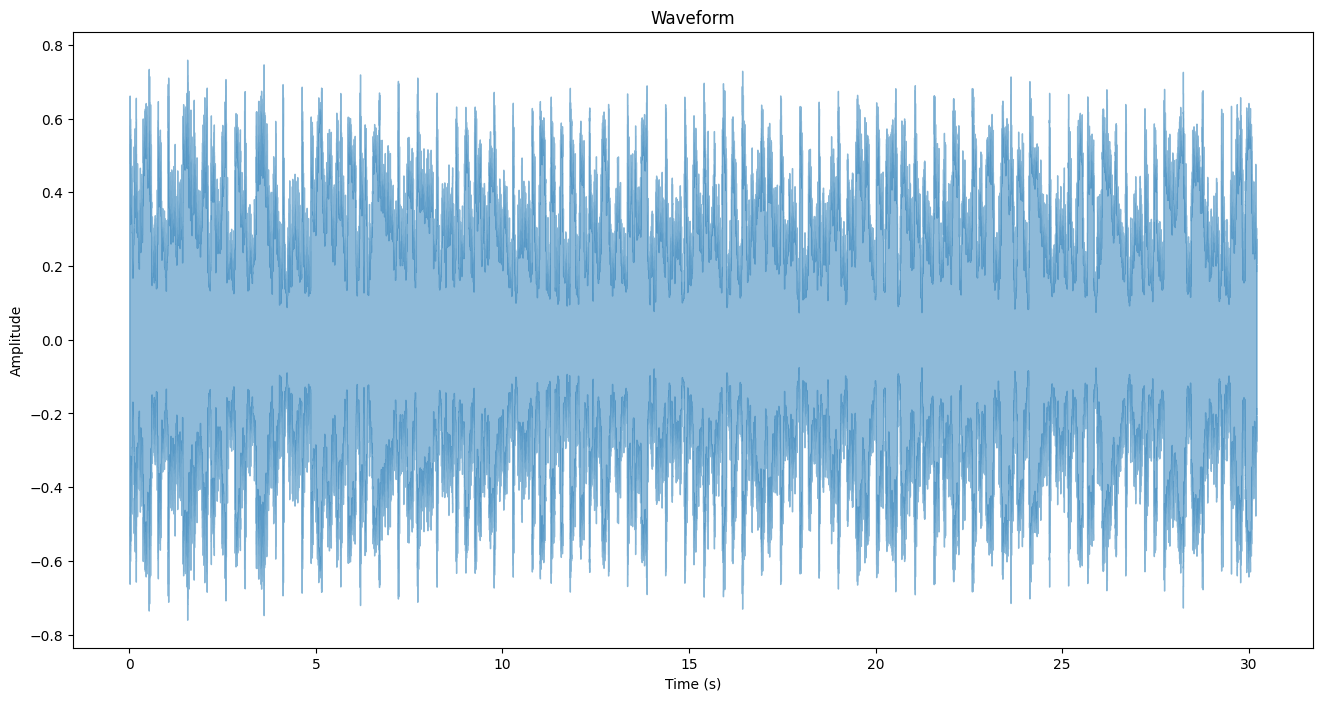

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [11]:
# WAVEFORM
plt.figure(figsize=FIG_SIZE)
librosa.display.waveshow(signal, sr=sample_rate, alpha=0.5)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform")

In [12]:
# Fourier Transform (FFT) - Frequency Domain
fft = np.fft.fft(signal)

In [13]:
# Calculate the Magnitude (abs values on complex numbers)
spectrum = np.abs(fft)

In [14]:
# Create the Frequency variable
f = np.linspace(0, sample_rate, len(spectrum))

Text(0.5, 1.0, 'Power Spectrum')

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

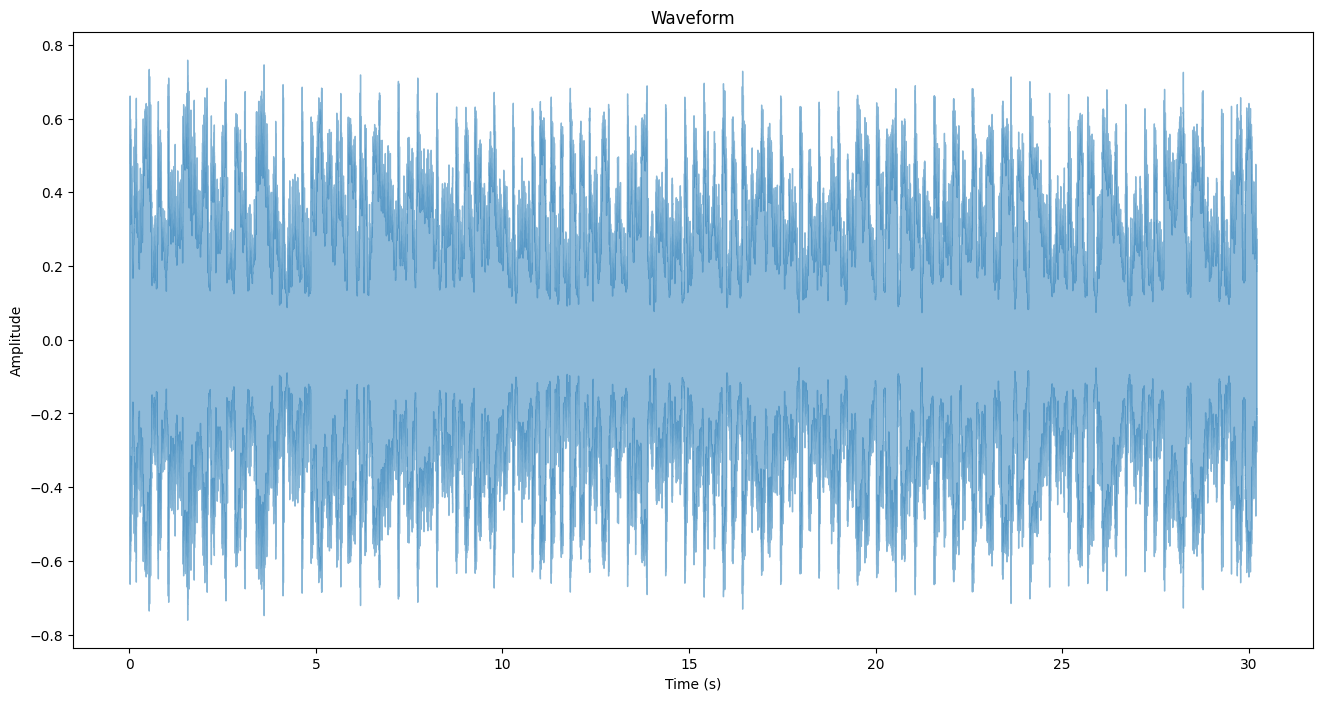

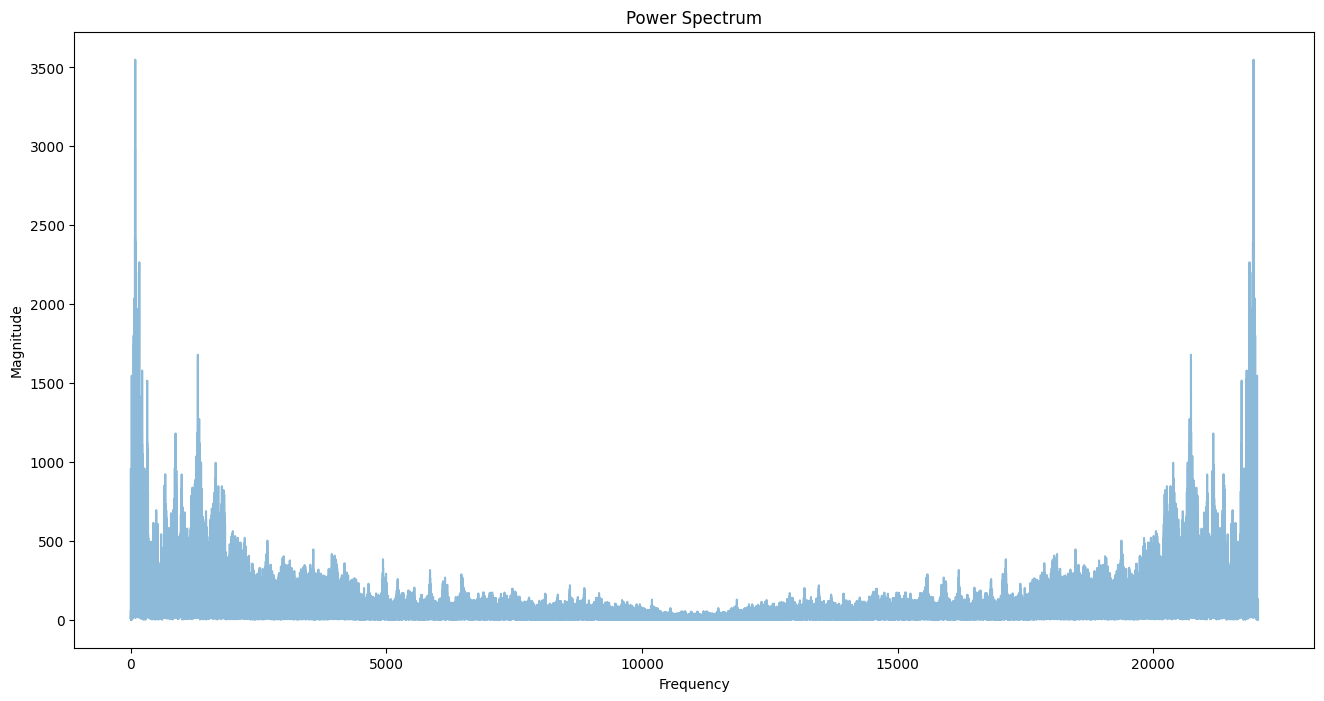

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [15]:
# Plot Spectrum
plt.figure(figsize=FIG_SIZE)
plt.plot(f, spectrum, alpha=0.5)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power Spectrum")

In [16]:
# Take half of the spectrum and frequency
left_spectrum = spectrum[:int(len(spectrum)/2)]
left_f = f[:int(len(spectrum)/2)]

Text(0.5, 1.0, 'Power Spectrum')

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

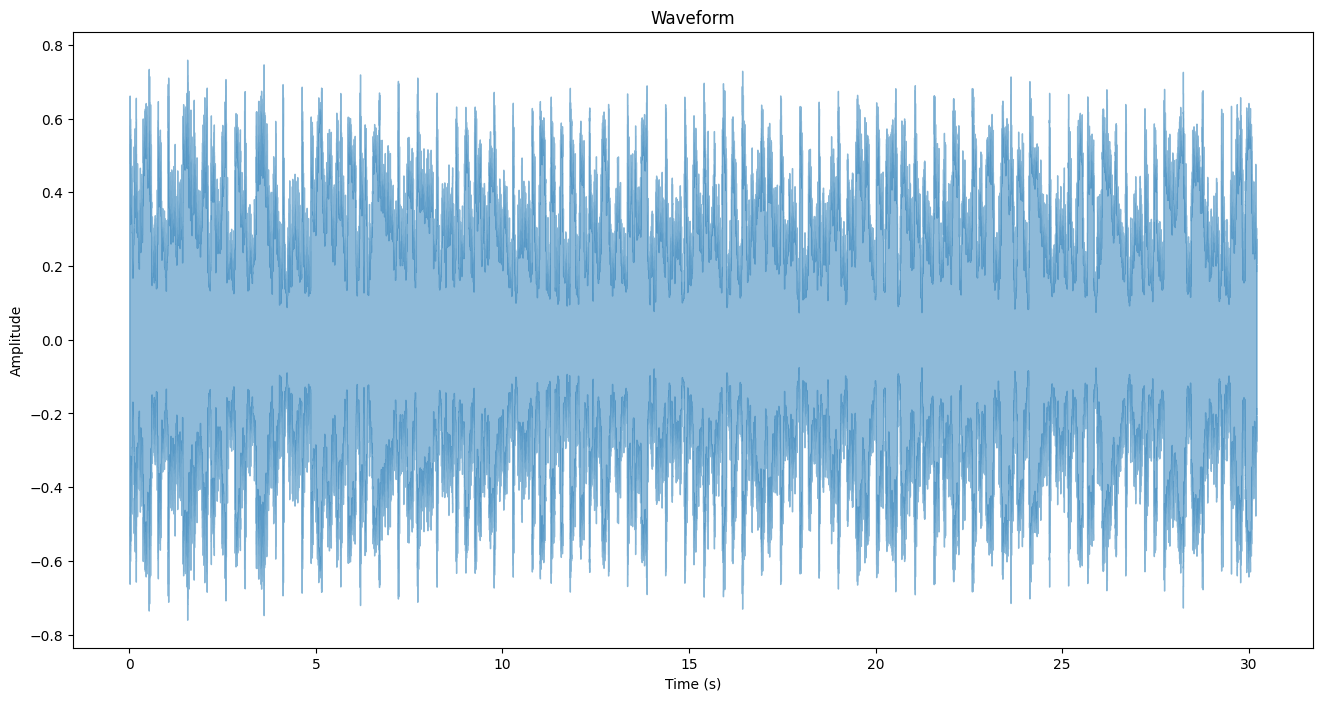

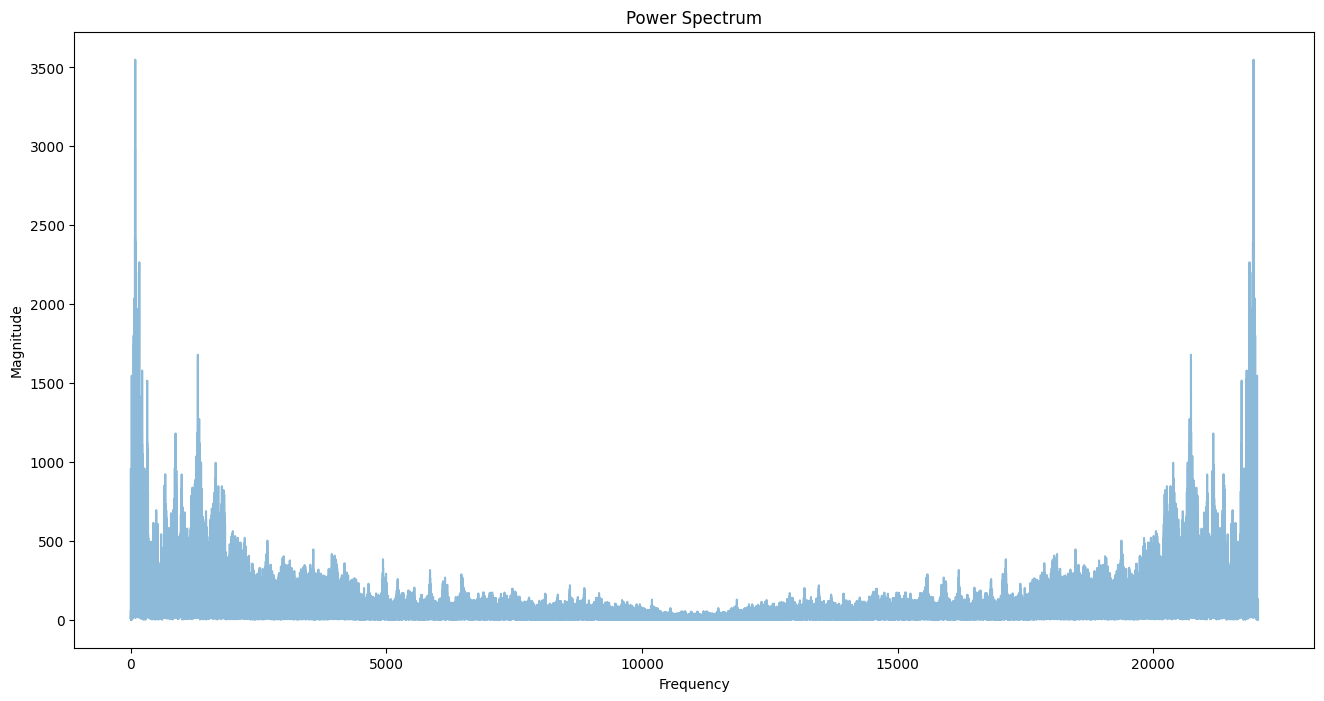

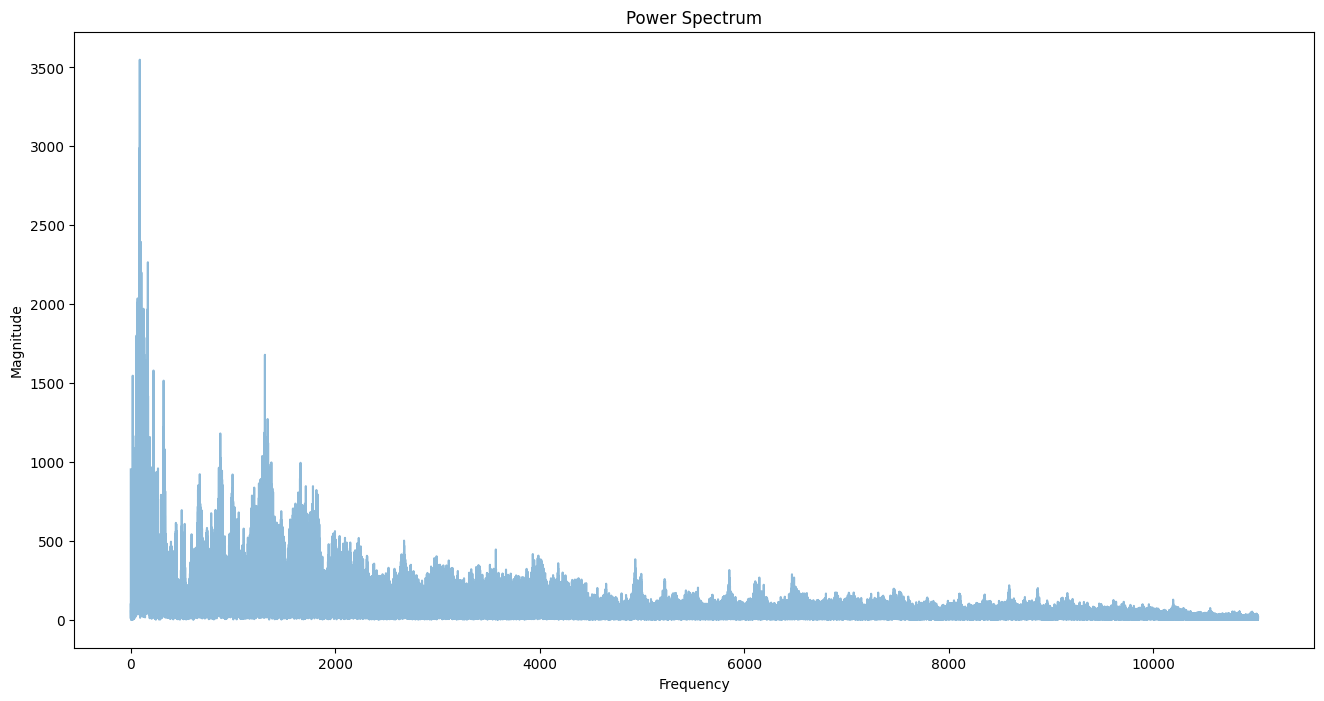

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [17]:
# Plot Spectrum
plt.figure(figsize=FIG_SIZE)
plt.plot(left_f, left_spectrum, alpha=0.5)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power Spectrum")

In [18]:
# Spectrogram (STFT)
hop_length = 512 # num. of samples
n_fft = 2048 # num. of samples for window

In [19]:
# Perform STFT
stft = librosa.stft(signal, n_fft=n_fft, hop_length=hop_length)

In [20]:
# Calculate the Magnitude (abs values on complex numbers)
spectrogram = np.abs(stft)

Text(0.5, 1.0, 'Spectrogram')

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

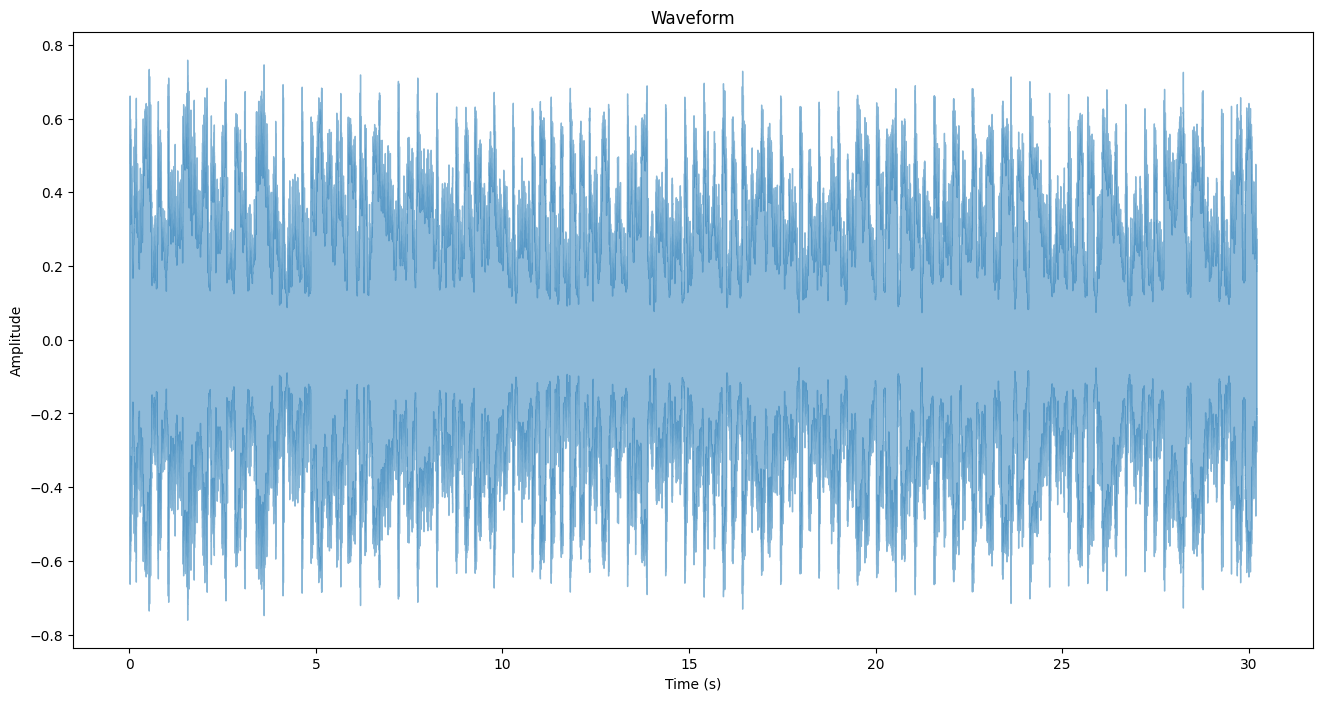

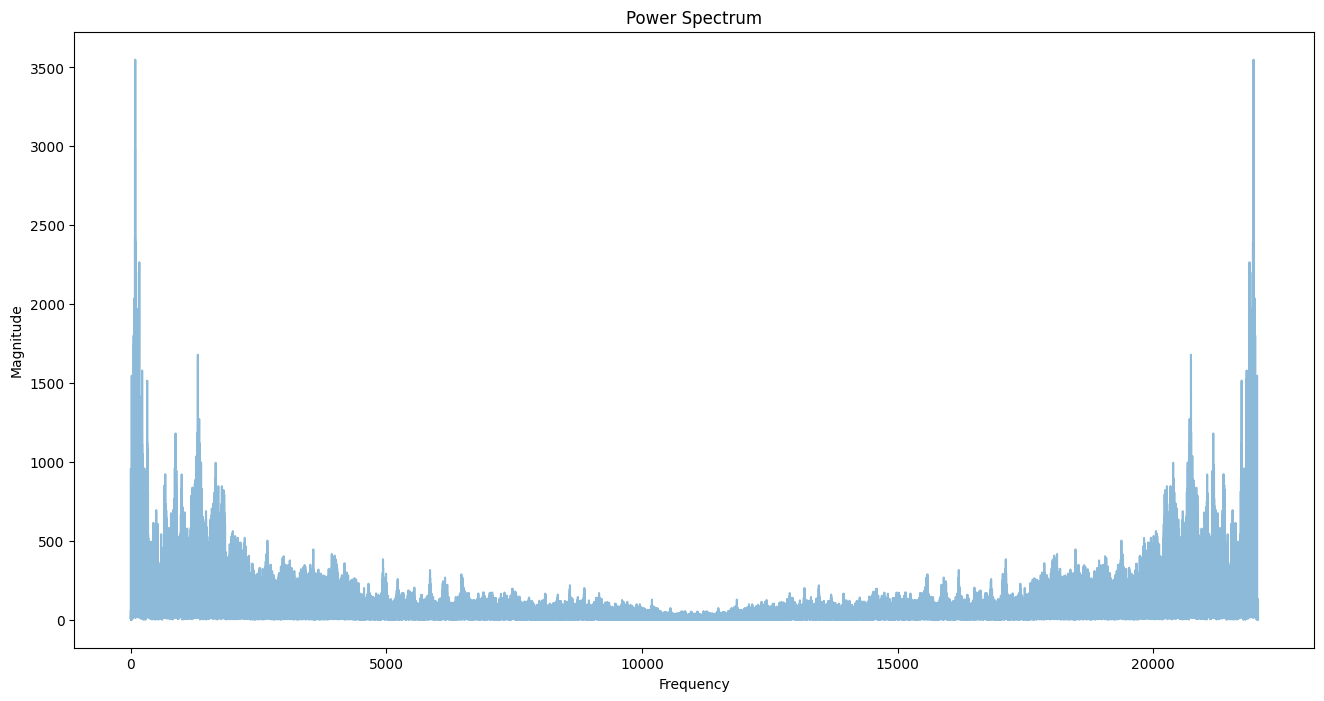

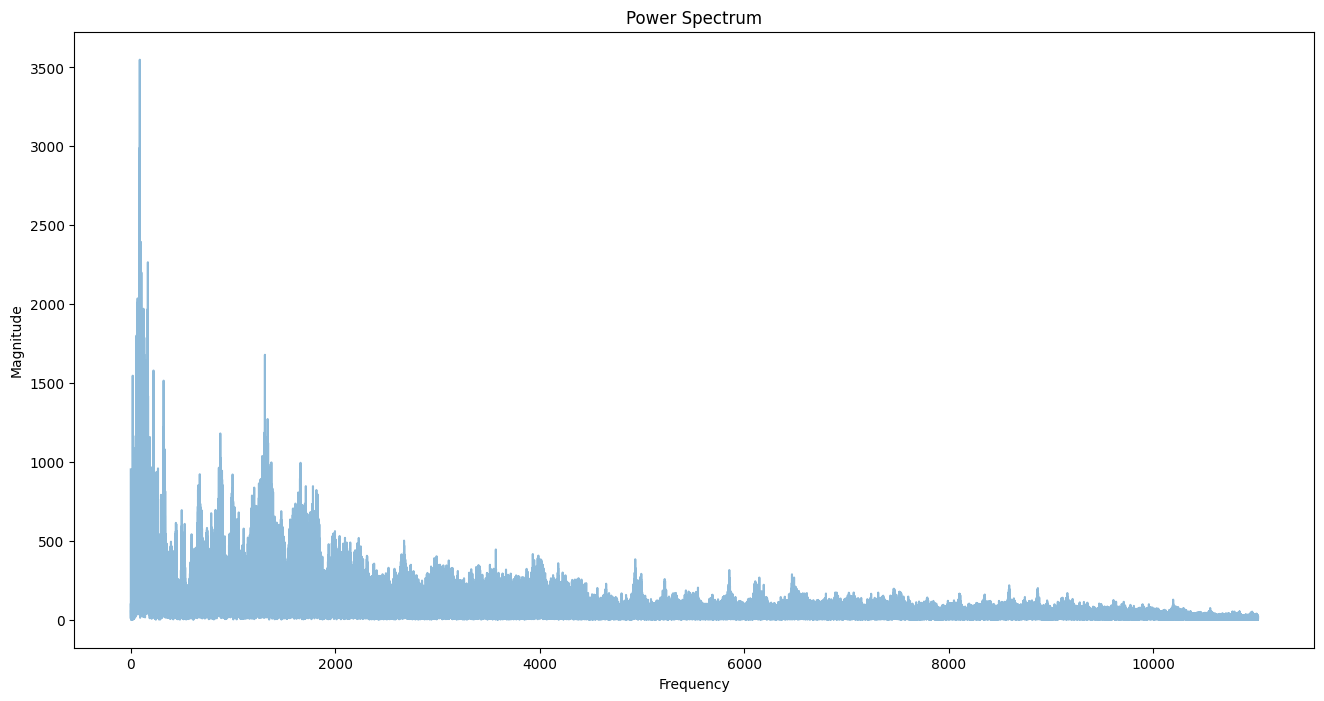

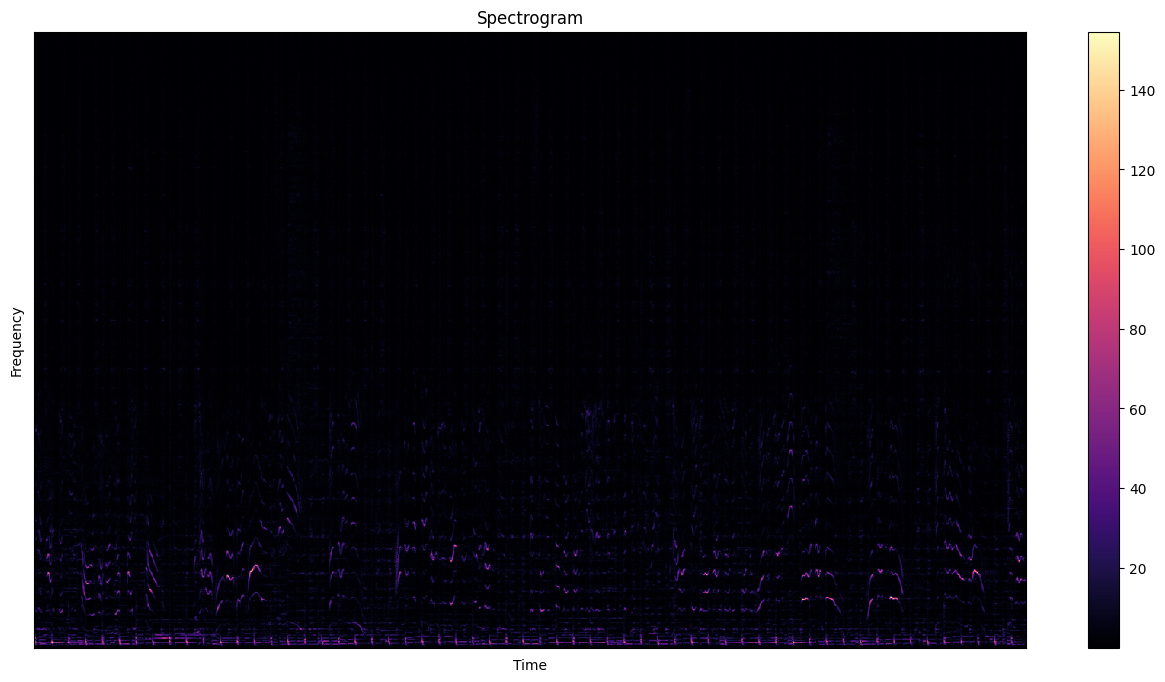

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [21]:
# Plot the Spectrogram
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.title("Spectrogram")

In [22]:
# Apply Logarithm to get values in Decibels
log_spectrogram = librosa.amplitude_to_db(spectrogram)

Text(0.5, 1.0, 'Spectrogram (dB)')

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

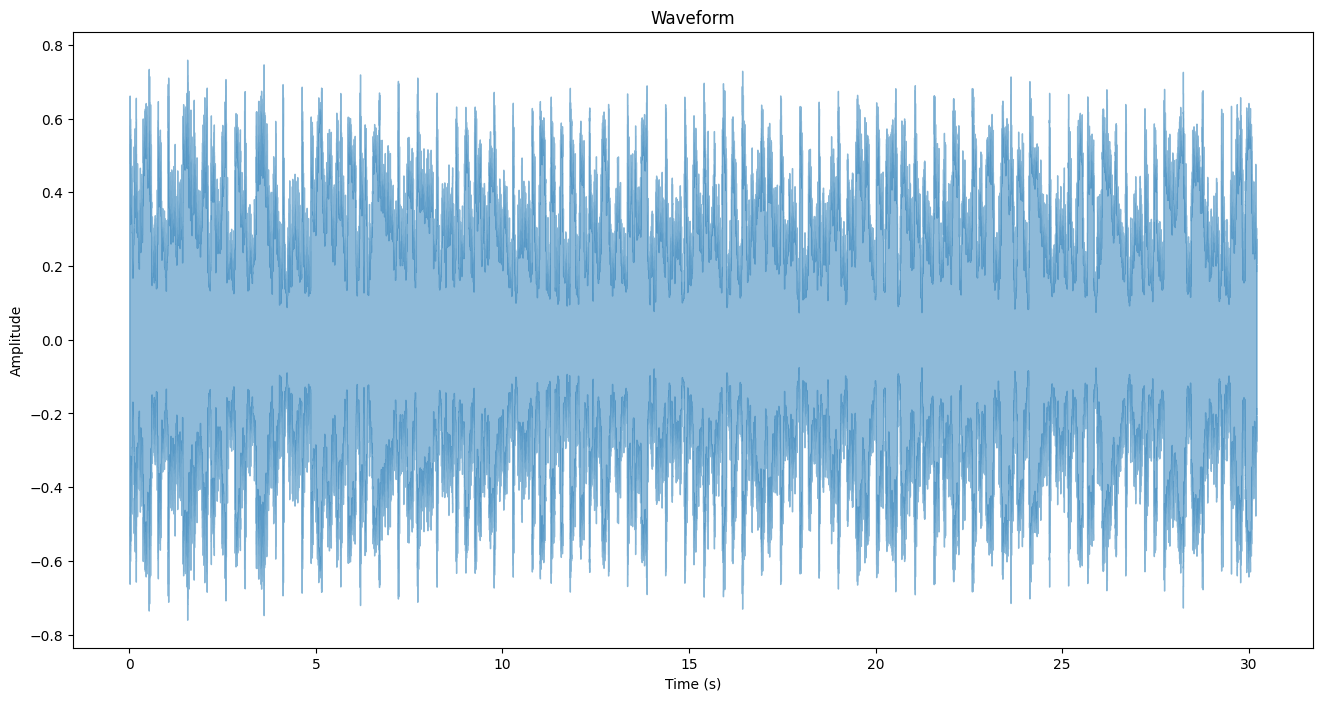

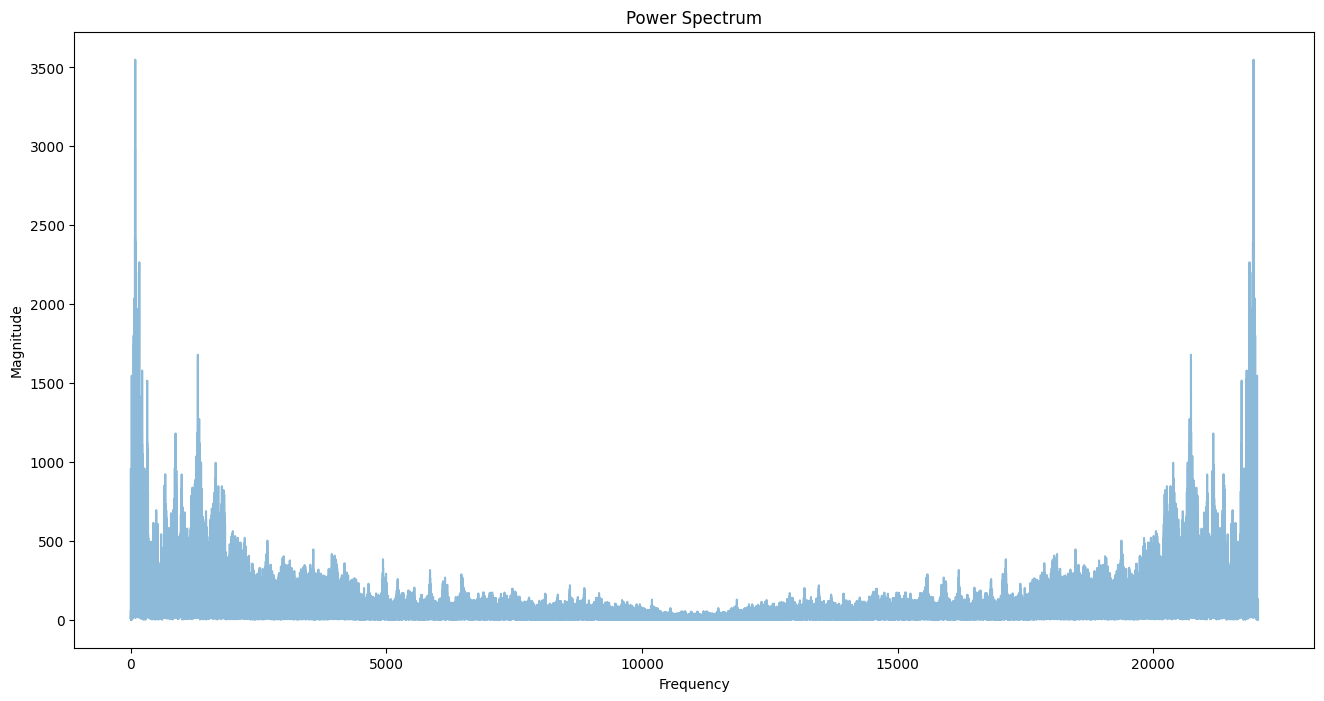

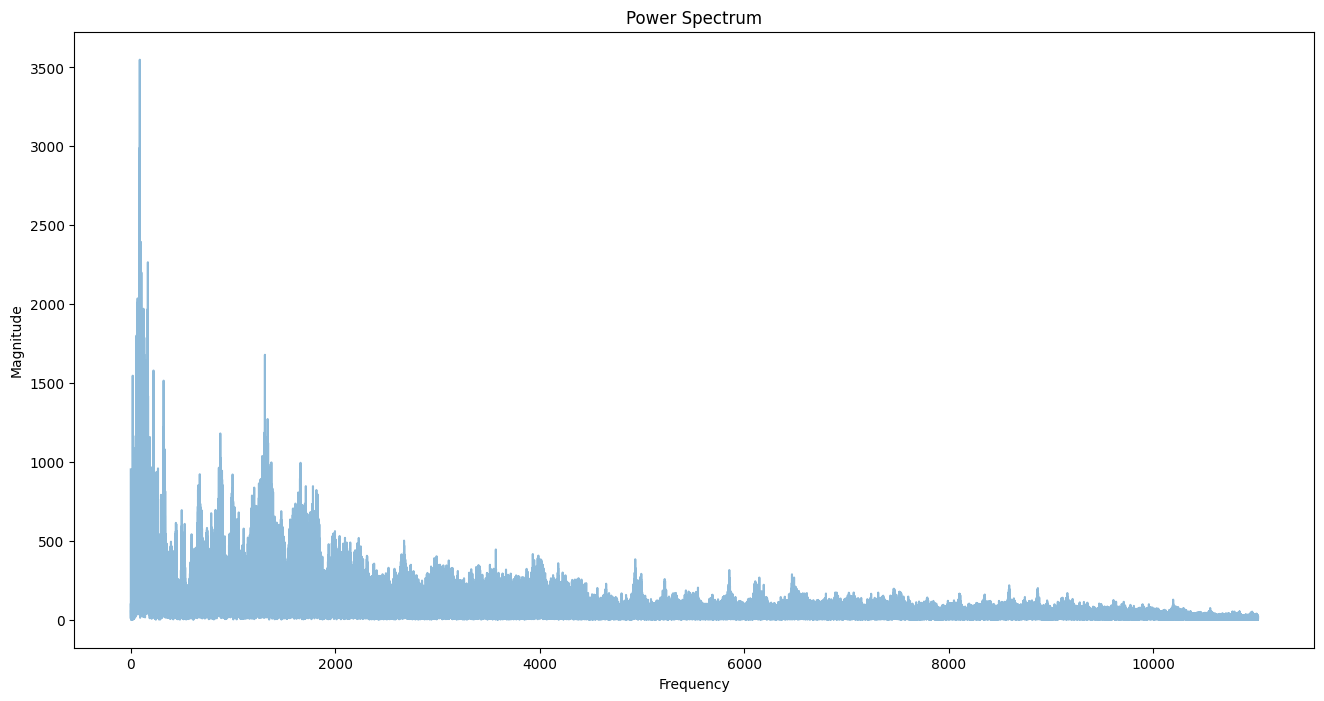

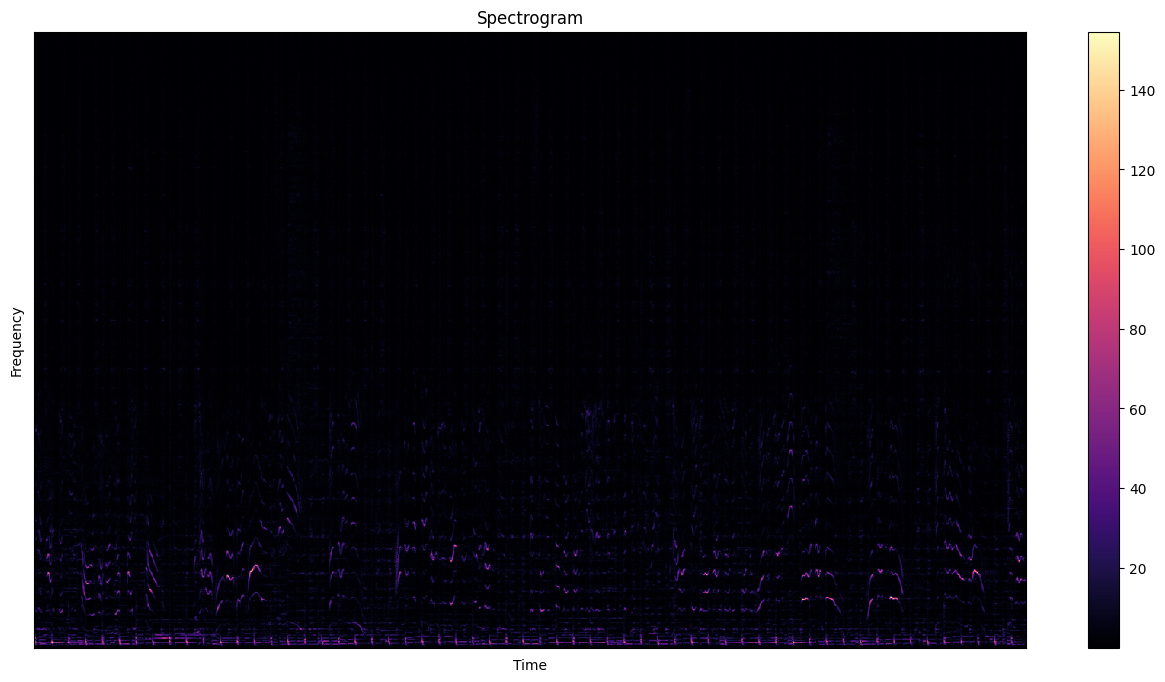

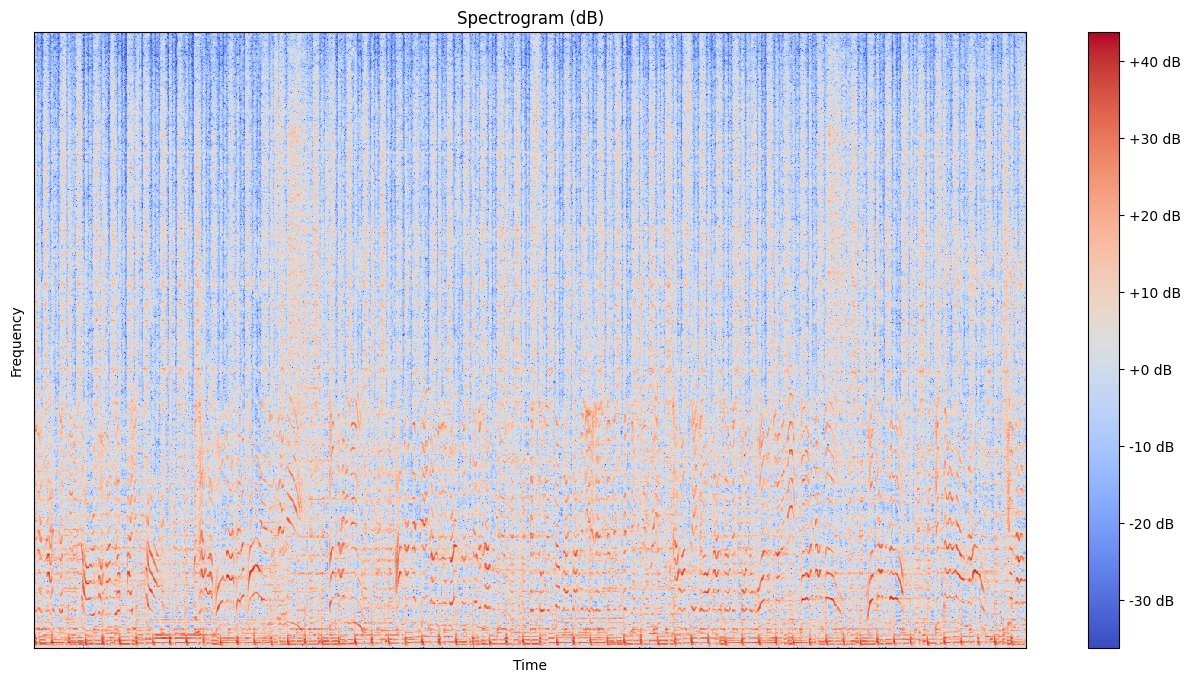

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [23]:
# Plot the Spectrogram in Decibels
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (dB)")

In [26]:
# MFCCs (we use 13 MFCCs)
MFCCs = librosa.feature.mfcc(y=signal, sr=sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)

Text(0.5, 1.0, 'MFCCs')

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

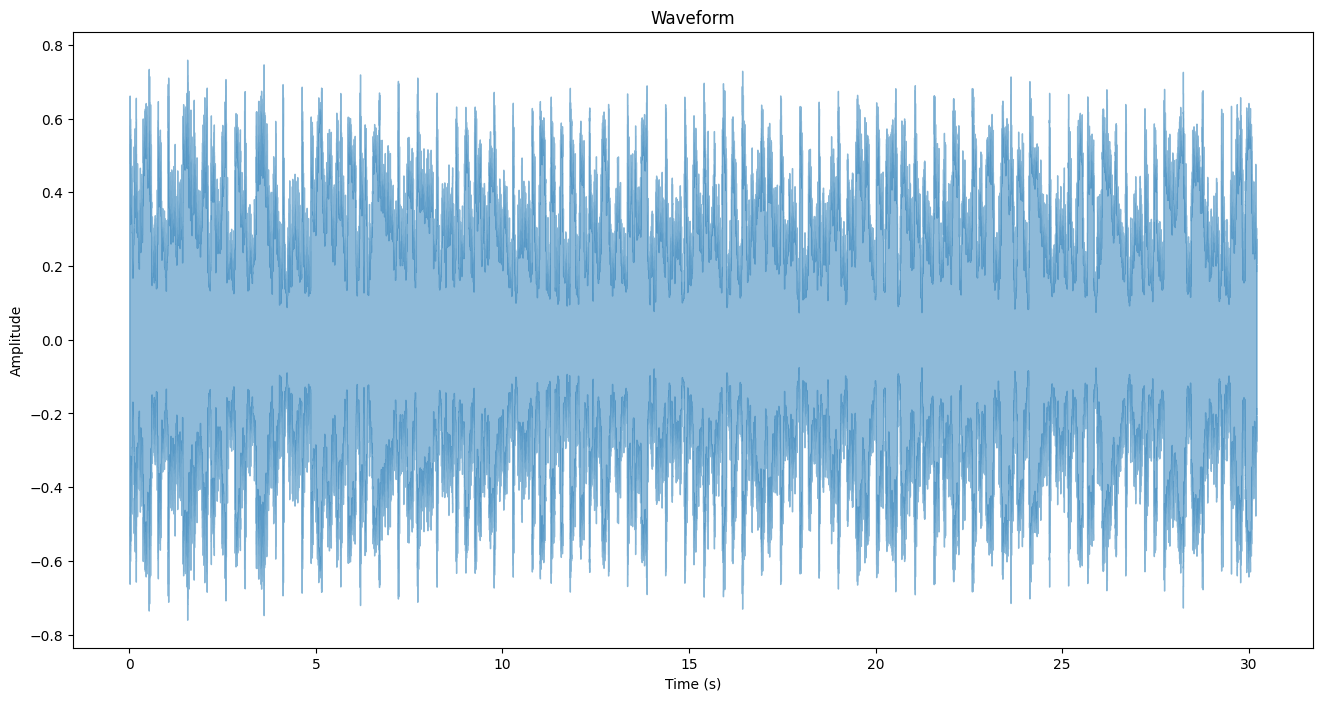

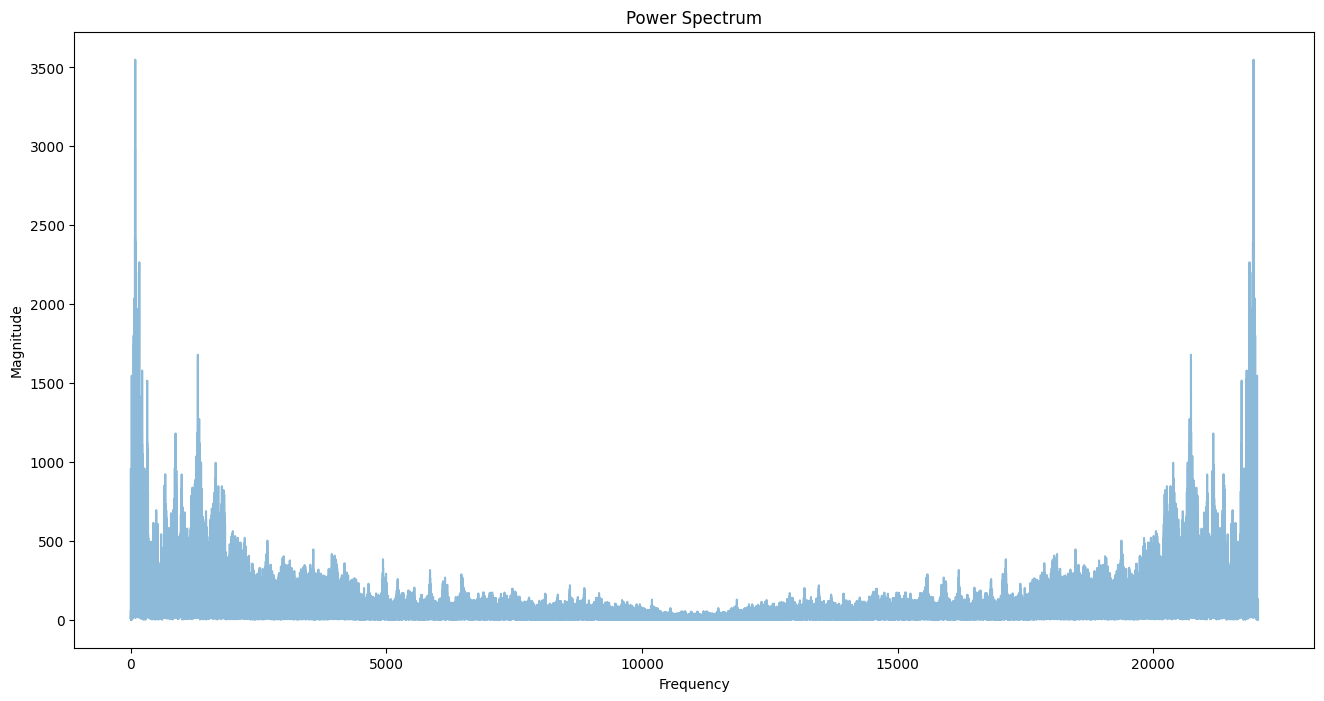

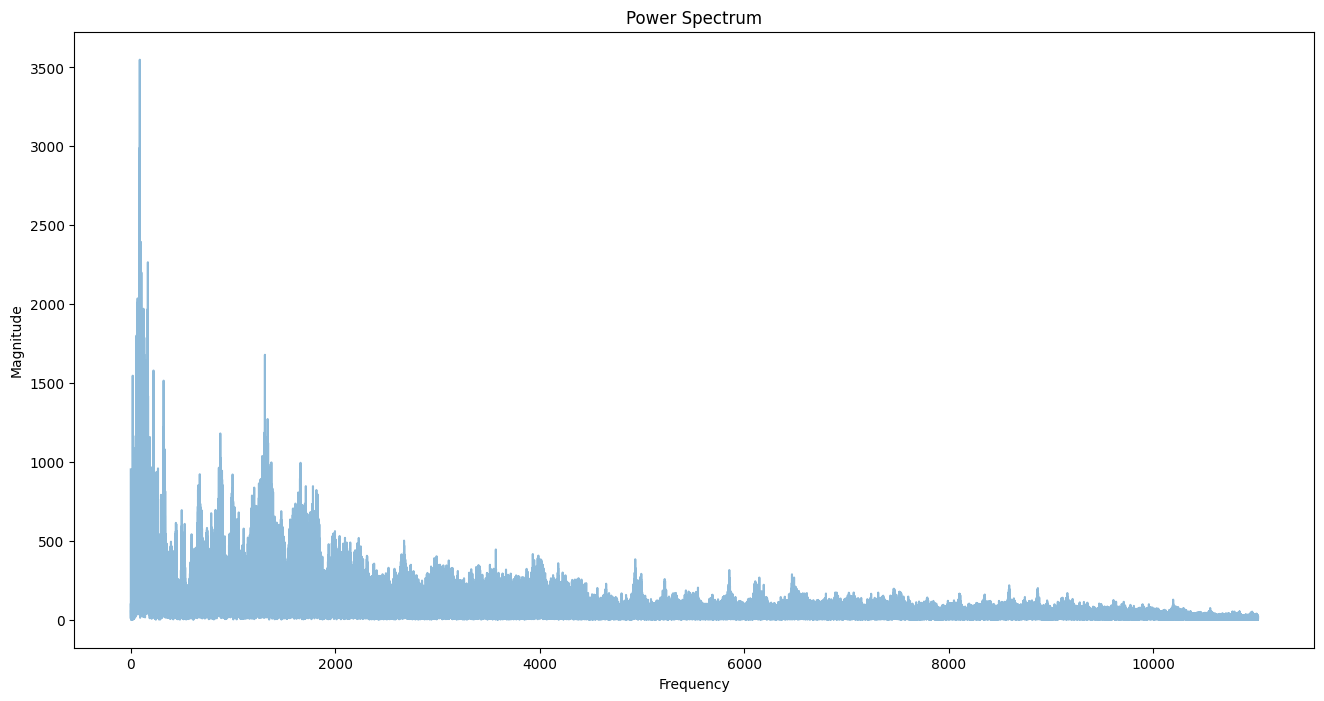

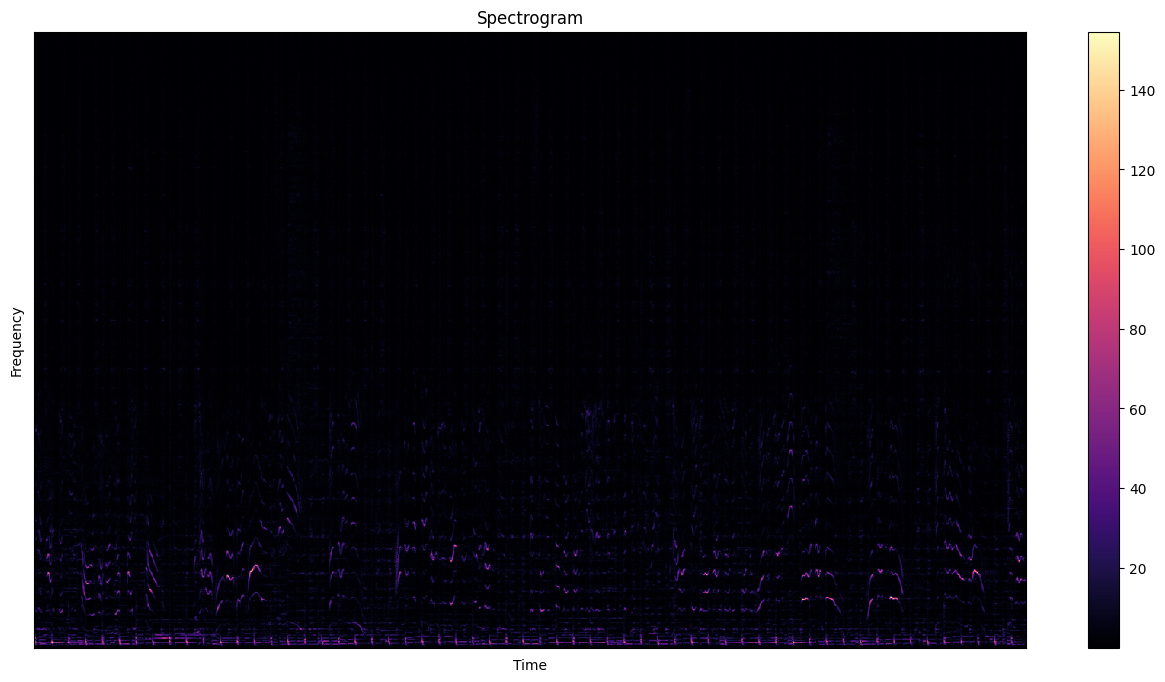

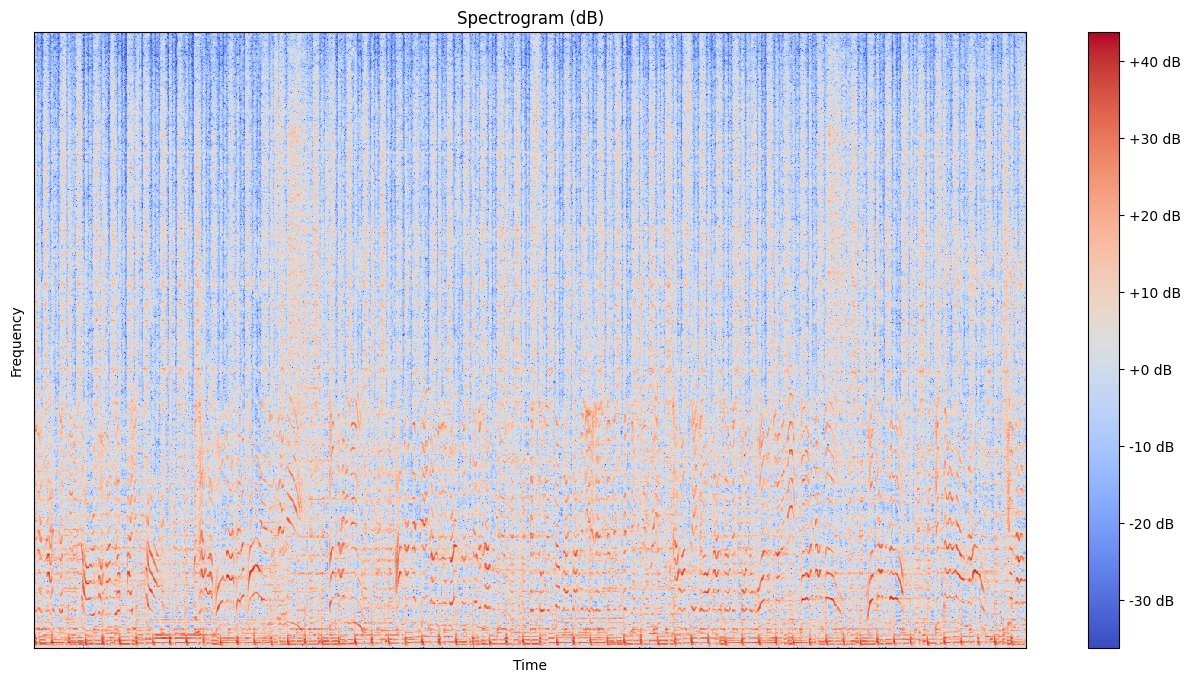

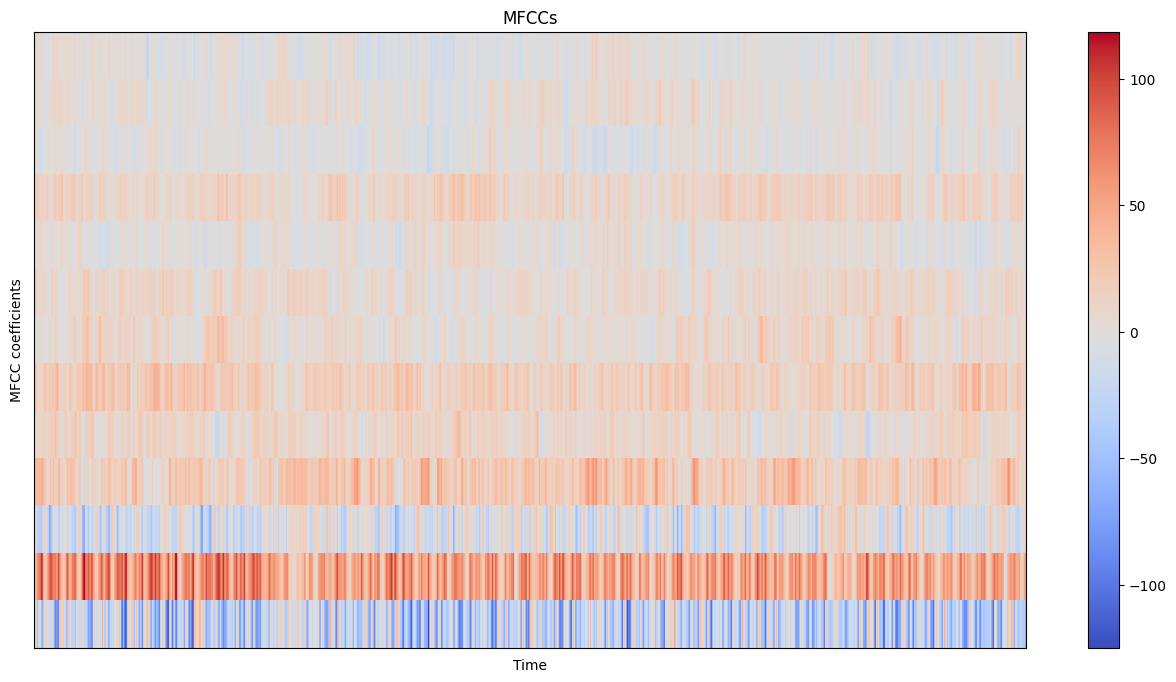

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [27]:
# Plot MFCCs
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.title("MFCCs")

In [28]:
import json
import os
import math

In [29]:
DATASET_PATH = "Data/genres_original"
JSON_PATH = "data_10.json"
SAMPLE_RATE = 22050
TRACK_DURATION = 30 # measured in seconds
SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION

In [33]:
def save_mfcc(dataset_path, json_path, num_mfcc=13, n_fft=2048, hop_length=512, num_segments=5):
    """Extracts MFCCs from music dataset and saves them into a json file along with genre labels.
        """

    # dictionary to store mapping, labels, and MFCCs
    data = {
        "mapping": [],
        "labels": [],
        "mfcc": []
    }

    samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
    num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)

    # loop through all genre sub-folder
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):

        # ensure we're processing a genre sub-folder level
        if dirpath is not dataset_path:

            # save genre label (i.e., sub-folder name) in the mapping
            semantic_label = dirpath.split("/")[-1]
            data["mapping"].append(semantic_label)
            print("\nProcessing: {}".format(semantic_label))

            # process all audio files in genre sub-dir
            for f in filenames:

		# load audio file
                file_path = os.path.join(dirpath, f)
                signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)

                # process all segments of audio file
                for d in range(num_segments):

                    # calculate start and finish sample for current segment
                    start = samples_per_segment * d
                    finish = start + samples_per_segment

                    # extract mfcc
                    mfcc = librosa.feature.mfcc(y=signal[start:finish], sr=sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
                    mfcc = mfcc.T

                    # store only mfcc feature with expected number of vectors
                    if len(mfcc) == num_mfcc_vectors_per_segment:
                        data["mfcc"].append(mfcc.tolist())
                        data["labels"].append(i-1)
                        print("{}, segment:{}".format(file_path, d+1))

    # save MFCCs to json file
    with open(json_path, "w") as fp:
        json.dump(data, fp, indent=4)

In [36]:
save_mfcc(DATASET_PATH, JSON_PATH, num_segments=10)


Processing: genres_original\blues
Data/genres_original\blues\blues.00000.wav, segment:1
Data/genres_original\blues\blues.00000.wav, segment:2
Data/genres_original\blues\blues.00000.wav, segment:3
Data/genres_original\blues\blues.00000.wav, segment:4
Data/genres_original\blues\blues.00000.wav, segment:5
Data/genres_original\blues\blues.00000.wav, segment:6
Data/genres_original\blues\blues.00000.wav, segment:7
Data/genres_original\blues\blues.00000.wav, segment:8
Data/genres_original\blues\blues.00000.wav, segment:9
Data/genres_original\blues\blues.00000.wav, segment:10
Data/genres_original\blues\blues.00001.wav, segment:1
Data/genres_original\blues\blues.00001.wav, segment:2
Data/genres_original\blues\blues.00001.wav, segment:3
Data/genres_original\blues\blues.00001.wav, segment:4
Data/genres_original\blues\blues.00001.wav, segment:5
Data/genres_original\blues\blues.00001.wav, segment:6
Data/genres_original\blues\blues.00001.wav, segment:7
Data/genres_original\blues\blues.00001.wav, se

Data/genres_original\blues\blues.00016.wav, segment:8
Data/genres_original\blues\blues.00016.wav, segment:9
Data/genres_original\blues\blues.00016.wav, segment:10
Data/genres_original\blues\blues.00017.wav, segment:1
Data/genres_original\blues\blues.00017.wav, segment:2
Data/genres_original\blues\blues.00017.wav, segment:3
Data/genres_original\blues\blues.00017.wav, segment:4
Data/genres_original\blues\blues.00017.wav, segment:5
Data/genres_original\blues\blues.00017.wav, segment:6
Data/genres_original\blues\blues.00017.wav, segment:7
Data/genres_original\blues\blues.00017.wav, segment:8
Data/genres_original\blues\blues.00017.wav, segment:9
Data/genres_original\blues\blues.00017.wav, segment:10
Data/genres_original\blues\blues.00018.wav, segment:1
Data/genres_original\blues\blues.00018.wav, segment:2
Data/genres_original\blues\blues.00018.wav, segment:3
Data/genres_original\blues\blues.00018.wav, segment:4
Data/genres_original\blues\blues.00018.wav, segment:5
Data/genres_original\blues

Data/genres_original\blues\blues.00033.wav, segment:1
Data/genres_original\blues\blues.00033.wav, segment:2
Data/genres_original\blues\blues.00033.wav, segment:3
Data/genres_original\blues\blues.00033.wav, segment:4
Data/genres_original\blues\blues.00033.wav, segment:5
Data/genres_original\blues\blues.00033.wav, segment:6
Data/genres_original\blues\blues.00033.wav, segment:7
Data/genres_original\blues\blues.00033.wav, segment:8
Data/genres_original\blues\blues.00033.wav, segment:9
Data/genres_original\blues\blues.00033.wav, segment:10
Data/genres_original\blues\blues.00034.wav, segment:1
Data/genres_original\blues\blues.00034.wav, segment:2
Data/genres_original\blues\blues.00034.wav, segment:3
Data/genres_original\blues\blues.00034.wav, segment:4
Data/genres_original\blues\blues.00034.wav, segment:5
Data/genres_original\blues\blues.00034.wav, segment:6
Data/genres_original\blues\blues.00034.wav, segment:7
Data/genres_original\blues\blues.00034.wav, segment:8
Data/genres_original\blues\

Data/genres_original\blues\blues.00049.wav, segment:5
Data/genres_original\blues\blues.00049.wav, segment:6
Data/genres_original\blues\blues.00049.wav, segment:7
Data/genres_original\blues\blues.00049.wav, segment:8
Data/genres_original\blues\blues.00049.wav, segment:9
Data/genres_original\blues\blues.00049.wav, segment:10
Data/genres_original\blues\blues.00050.wav, segment:1
Data/genres_original\blues\blues.00050.wav, segment:2
Data/genres_original\blues\blues.00050.wav, segment:3
Data/genres_original\blues\blues.00050.wav, segment:4
Data/genres_original\blues\blues.00050.wav, segment:5
Data/genres_original\blues\blues.00050.wav, segment:6
Data/genres_original\blues\blues.00050.wav, segment:7
Data/genres_original\blues\blues.00050.wav, segment:8
Data/genres_original\blues\blues.00050.wav, segment:9
Data/genres_original\blues\blues.00050.wav, segment:10
Data/genres_original\blues\blues.00051.wav, segment:1
Data/genres_original\blues\blues.00051.wav, segment:2
Data/genres_original\blues

Data/genres_original\blues\blues.00065.wav, segment:5
Data/genres_original\blues\blues.00065.wav, segment:6
Data/genres_original\blues\blues.00065.wav, segment:7
Data/genres_original\blues\blues.00065.wav, segment:8
Data/genres_original\blues\blues.00065.wav, segment:9
Data/genres_original\blues\blues.00065.wav, segment:10
Data/genres_original\blues\blues.00066.wav, segment:1
Data/genres_original\blues\blues.00066.wav, segment:2
Data/genres_original\blues\blues.00066.wav, segment:3
Data/genres_original\blues\blues.00066.wav, segment:4
Data/genres_original\blues\blues.00066.wav, segment:5
Data/genres_original\blues\blues.00066.wav, segment:6
Data/genres_original\blues\blues.00066.wav, segment:7
Data/genres_original\blues\blues.00066.wav, segment:8
Data/genres_original\blues\blues.00066.wav, segment:9
Data/genres_original\blues\blues.00066.wav, segment:10
Data/genres_original\blues\blues.00067.wav, segment:1
Data/genres_original\blues\blues.00067.wav, segment:2
Data/genres_original\blues

Data/genres_original\blues\blues.00081.wav, segment:10
Data/genres_original\blues\blues.00082.wav, segment:1
Data/genres_original\blues\blues.00082.wav, segment:2
Data/genres_original\blues\blues.00082.wav, segment:3
Data/genres_original\blues\blues.00082.wav, segment:4
Data/genres_original\blues\blues.00082.wav, segment:5
Data/genres_original\blues\blues.00082.wav, segment:6
Data/genres_original\blues\blues.00082.wav, segment:7
Data/genres_original\blues\blues.00082.wav, segment:8
Data/genres_original\blues\blues.00082.wav, segment:9
Data/genres_original\blues\blues.00082.wav, segment:10
Data/genres_original\blues\blues.00083.wav, segment:1
Data/genres_original\blues\blues.00083.wav, segment:2
Data/genres_original\blues\blues.00083.wav, segment:3
Data/genres_original\blues\blues.00083.wav, segment:4
Data/genres_original\blues\blues.00083.wav, segment:5
Data/genres_original\blues\blues.00083.wav, segment:6
Data/genres_original\blues\blues.00083.wav, segment:7
Data/genres_original\blues

Data/genres_original\blues\blues.00097.wav, segment:3
Data/genres_original\blues\blues.00097.wav, segment:4
Data/genres_original\blues\blues.00097.wav, segment:5
Data/genres_original\blues\blues.00097.wav, segment:6
Data/genres_original\blues\blues.00097.wav, segment:7
Data/genres_original\blues\blues.00097.wav, segment:8
Data/genres_original\blues\blues.00097.wav, segment:9
Data/genres_original\blues\blues.00097.wav, segment:10
Data/genres_original\blues\blues.00098.wav, segment:1
Data/genres_original\blues\blues.00098.wav, segment:2
Data/genres_original\blues\blues.00098.wav, segment:3
Data/genres_original\blues\blues.00098.wav, segment:4
Data/genres_original\blues\blues.00098.wav, segment:5
Data/genres_original\blues\blues.00098.wav, segment:6
Data/genres_original\blues\blues.00098.wav, segment:7
Data/genres_original\blues\blues.00098.wav, segment:8
Data/genres_original\blues\blues.00098.wav, segment:9
Data/genres_original\blues\blues.00098.wav, segment:10
Data/genres_original\blues

Data/genres_original\classical\classical.00011.wav, segment:8
Data/genres_original\classical\classical.00011.wav, segment:9
Data/genres_original\classical\classical.00011.wav, segment:10
Data/genres_original\classical\classical.00012.wav, segment:1
Data/genres_original\classical\classical.00012.wav, segment:2
Data/genres_original\classical\classical.00012.wav, segment:3
Data/genres_original\classical\classical.00012.wav, segment:4
Data/genres_original\classical\classical.00012.wav, segment:5
Data/genres_original\classical\classical.00012.wav, segment:6
Data/genres_original\classical\classical.00012.wav, segment:7
Data/genres_original\classical\classical.00012.wav, segment:8
Data/genres_original\classical\classical.00012.wav, segment:9
Data/genres_original\classical\classical.00012.wav, segment:10
Data/genres_original\classical\classical.00013.wav, segment:1
Data/genres_original\classical\classical.00013.wav, segment:2
Data/genres_original\classical\classical.00013.wav, segment:3
Data/g

Data/genres_original\classical\classical.00026.wav, segment:1
Data/genres_original\classical\classical.00026.wav, segment:2
Data/genres_original\classical\classical.00026.wav, segment:3
Data/genres_original\classical\classical.00026.wav, segment:4
Data/genres_original\classical\classical.00026.wav, segment:5
Data/genres_original\classical\classical.00026.wav, segment:6
Data/genres_original\classical\classical.00026.wav, segment:7
Data/genres_original\classical\classical.00026.wav, segment:8
Data/genres_original\classical\classical.00026.wav, segment:9
Data/genres_original\classical\classical.00026.wav, segment:10
Data/genres_original\classical\classical.00027.wav, segment:1
Data/genres_original\classical\classical.00027.wav, segment:2
Data/genres_original\classical\classical.00027.wav, segment:3
Data/genres_original\classical\classical.00027.wav, segment:4
Data/genres_original\classical\classical.00027.wav, segment:5
Data/genres_original\classical\classical.00027.wav, segment:6
Data/ge

Data/genres_original\classical\classical.00039.wav, segment:7
Data/genres_original\classical\classical.00039.wav, segment:8
Data/genres_original\classical\classical.00039.wav, segment:9
Data/genres_original\classical\classical.00039.wav, segment:10
Data/genres_original\classical\classical.00040.wav, segment:1
Data/genres_original\classical\classical.00040.wav, segment:2
Data/genres_original\classical\classical.00040.wav, segment:3
Data/genres_original\classical\classical.00040.wav, segment:4
Data/genres_original\classical\classical.00040.wav, segment:5
Data/genres_original\classical\classical.00040.wav, segment:6
Data/genres_original\classical\classical.00040.wav, segment:7
Data/genres_original\classical\classical.00040.wav, segment:8
Data/genres_original\classical\classical.00040.wav, segment:9
Data/genres_original\classical\classical.00040.wav, segment:10
Data/genres_original\classical\classical.00041.wav, segment:1
Data/genres_original\classical\classical.00041.wav, segment:2
Data/g

Data/genres_original\classical\classical.00054.wav, segment:3
Data/genres_original\classical\classical.00054.wav, segment:4
Data/genres_original\classical\classical.00054.wav, segment:5
Data/genres_original\classical\classical.00054.wav, segment:6
Data/genres_original\classical\classical.00054.wav, segment:7
Data/genres_original\classical\classical.00054.wav, segment:8
Data/genres_original\classical\classical.00054.wav, segment:9
Data/genres_original\classical\classical.00054.wav, segment:10
Data/genres_original\classical\classical.00055.wav, segment:1
Data/genres_original\classical\classical.00055.wav, segment:2
Data/genres_original\classical\classical.00055.wav, segment:3
Data/genres_original\classical\classical.00055.wav, segment:4
Data/genres_original\classical\classical.00055.wav, segment:5
Data/genres_original\classical\classical.00055.wav, segment:6
Data/genres_original\classical\classical.00055.wav, segment:7
Data/genres_original\classical\classical.00055.wav, segment:8
Data/ge

Data/genres_original\classical\classical.00067.wav, segment:10
Data/genres_original\classical\classical.00068.wav, segment:1
Data/genres_original\classical\classical.00068.wav, segment:2
Data/genres_original\classical\classical.00068.wav, segment:3
Data/genres_original\classical\classical.00068.wav, segment:4
Data/genres_original\classical\classical.00068.wav, segment:5
Data/genres_original\classical\classical.00068.wav, segment:6
Data/genres_original\classical\classical.00068.wav, segment:7
Data/genres_original\classical\classical.00068.wav, segment:8
Data/genres_original\classical\classical.00068.wav, segment:9
Data/genres_original\classical\classical.00068.wav, segment:10
Data/genres_original\classical\classical.00069.wav, segment:1
Data/genres_original\classical\classical.00069.wav, segment:2
Data/genres_original\classical\classical.00069.wav, segment:3
Data/genres_original\classical\classical.00069.wav, segment:4
Data/genres_original\classical\classical.00069.wav, segment:5
Data/g

Data/genres_original\classical\classical.00082.wav, segment:4
Data/genres_original\classical\classical.00082.wav, segment:5
Data/genres_original\classical\classical.00082.wav, segment:6
Data/genres_original\classical\classical.00082.wav, segment:7
Data/genres_original\classical\classical.00082.wav, segment:8
Data/genres_original\classical\classical.00082.wav, segment:9
Data/genres_original\classical\classical.00082.wav, segment:10
Data/genres_original\classical\classical.00083.wav, segment:1
Data/genres_original\classical\classical.00083.wav, segment:2
Data/genres_original\classical\classical.00083.wav, segment:3
Data/genres_original\classical\classical.00083.wav, segment:4
Data/genres_original\classical\classical.00083.wav, segment:5
Data/genres_original\classical\classical.00083.wav, segment:6
Data/genres_original\classical\classical.00083.wav, segment:7
Data/genres_original\classical\classical.00083.wav, segment:8
Data/genres_original\classical\classical.00083.wav, segment:9
Data/ge

Data/genres_original\classical\classical.00096.wav, segment:1
Data/genres_original\classical\classical.00096.wav, segment:2
Data/genres_original\classical\classical.00096.wav, segment:3
Data/genres_original\classical\classical.00096.wav, segment:4
Data/genres_original\classical\classical.00096.wav, segment:5
Data/genres_original\classical\classical.00096.wav, segment:6
Data/genres_original\classical\classical.00096.wav, segment:7
Data/genres_original\classical\classical.00096.wav, segment:8
Data/genres_original\classical\classical.00096.wav, segment:9
Data/genres_original\classical\classical.00096.wav, segment:10
Data/genres_original\classical\classical.00097.wav, segment:1
Data/genres_original\classical\classical.00097.wav, segment:2
Data/genres_original\classical\classical.00097.wav, segment:3
Data/genres_original\classical\classical.00097.wav, segment:4
Data/genres_original\classical\classical.00097.wav, segment:5
Data/genres_original\classical\classical.00097.wav, segment:6
Data/ge

Data/genres_original\country\country.00009.wav, segment:10
Data/genres_original\country\country.00010.wav, segment:1
Data/genres_original\country\country.00010.wav, segment:2
Data/genres_original\country\country.00010.wav, segment:3
Data/genres_original\country\country.00010.wav, segment:4
Data/genres_original\country\country.00010.wav, segment:5
Data/genres_original\country\country.00010.wav, segment:6
Data/genres_original\country\country.00010.wav, segment:7
Data/genres_original\country\country.00010.wav, segment:8
Data/genres_original\country\country.00010.wav, segment:9
Data/genres_original\country\country.00010.wav, segment:10
Data/genres_original\country\country.00011.wav, segment:1
Data/genres_original\country\country.00011.wav, segment:2
Data/genres_original\country\country.00011.wav, segment:3
Data/genres_original\country\country.00011.wav, segment:4
Data/genres_original\country\country.00011.wav, segment:5
Data/genres_original\country\country.00011.wav, segment:6
Data/genres_

Data/genres_original\country\country.00025.wav, segment:5
Data/genres_original\country\country.00025.wav, segment:6
Data/genres_original\country\country.00025.wav, segment:7
Data/genres_original\country\country.00025.wav, segment:8
Data/genres_original\country\country.00025.wav, segment:9
Data/genres_original\country\country.00025.wav, segment:10
Data/genres_original\country\country.00026.wav, segment:1
Data/genres_original\country\country.00026.wav, segment:2
Data/genres_original\country\country.00026.wav, segment:3
Data/genres_original\country\country.00026.wav, segment:4
Data/genres_original\country\country.00026.wav, segment:5
Data/genres_original\country\country.00026.wav, segment:6
Data/genres_original\country\country.00026.wav, segment:7
Data/genres_original\country\country.00026.wav, segment:8
Data/genres_original\country\country.00026.wav, segment:9
Data/genres_original\country\country.00026.wav, segment:10
Data/genres_original\country\country.00027.wav, segment:1
Data/genres_

Data/genres_original\country\country.00040.wav, segment:10
Data/genres_original\country\country.00041.wav, segment:1
Data/genres_original\country\country.00041.wav, segment:2
Data/genres_original\country\country.00041.wav, segment:3
Data/genres_original\country\country.00041.wav, segment:4
Data/genres_original\country\country.00041.wav, segment:5
Data/genres_original\country\country.00041.wav, segment:6
Data/genres_original\country\country.00041.wav, segment:7
Data/genres_original\country\country.00041.wav, segment:8
Data/genres_original\country\country.00041.wav, segment:9
Data/genres_original\country\country.00041.wav, segment:10
Data/genres_original\country\country.00042.wav, segment:1
Data/genres_original\country\country.00042.wav, segment:2
Data/genres_original\country\country.00042.wav, segment:3
Data/genres_original\country\country.00042.wav, segment:4
Data/genres_original\country\country.00042.wav, segment:5
Data/genres_original\country\country.00042.wav, segment:6
Data/genres_

Data/genres_original\country\country.00055.wav, segment:9
Data/genres_original\country\country.00055.wav, segment:10
Data/genres_original\country\country.00056.wav, segment:1
Data/genres_original\country\country.00056.wav, segment:2
Data/genres_original\country\country.00056.wav, segment:3
Data/genres_original\country\country.00056.wav, segment:4
Data/genres_original\country\country.00056.wav, segment:5
Data/genres_original\country\country.00056.wav, segment:6
Data/genres_original\country\country.00056.wav, segment:7
Data/genres_original\country\country.00056.wav, segment:8
Data/genres_original\country\country.00056.wav, segment:9
Data/genres_original\country\country.00056.wav, segment:10
Data/genres_original\country\country.00057.wav, segment:1
Data/genres_original\country\country.00057.wav, segment:2
Data/genres_original\country\country.00057.wav, segment:3
Data/genres_original\country\country.00057.wav, segment:4
Data/genres_original\country\country.00057.wav, segment:5
Data/genres_

Data/genres_original\country\country.00070.wav, segment:1
Data/genres_original\country\country.00070.wav, segment:2
Data/genres_original\country\country.00070.wav, segment:3
Data/genres_original\country\country.00070.wav, segment:4
Data/genres_original\country\country.00070.wav, segment:5
Data/genres_original\country\country.00070.wav, segment:6
Data/genres_original\country\country.00070.wav, segment:7
Data/genres_original\country\country.00070.wav, segment:8
Data/genres_original\country\country.00070.wav, segment:9
Data/genres_original\country\country.00070.wav, segment:10
Data/genres_original\country\country.00071.wav, segment:1
Data/genres_original\country\country.00071.wav, segment:2
Data/genres_original\country\country.00071.wav, segment:3
Data/genres_original\country\country.00071.wav, segment:4
Data/genres_original\country\country.00071.wav, segment:5
Data/genres_original\country\country.00071.wav, segment:6
Data/genres_original\country\country.00071.wav, segment:7
Data/genres_o

Data/genres_original\country\country.00084.wav, segment:3
Data/genres_original\country\country.00084.wav, segment:4
Data/genres_original\country\country.00084.wav, segment:5
Data/genres_original\country\country.00084.wav, segment:6
Data/genres_original\country\country.00084.wav, segment:7
Data/genres_original\country\country.00084.wav, segment:8
Data/genres_original\country\country.00084.wav, segment:9
Data/genres_original\country\country.00084.wav, segment:10
Data/genres_original\country\country.00085.wav, segment:1
Data/genres_original\country\country.00085.wav, segment:2
Data/genres_original\country\country.00085.wav, segment:3
Data/genres_original\country\country.00085.wav, segment:4
Data/genres_original\country\country.00085.wav, segment:5
Data/genres_original\country\country.00085.wav, segment:6
Data/genres_original\country\country.00085.wav, segment:7
Data/genres_original\country\country.00085.wav, segment:8
Data/genres_original\country\country.00085.wav, segment:9
Data/genres_o

Data/genres_original\country\country.00098.wav, segment:7
Data/genres_original\country\country.00098.wav, segment:8
Data/genres_original\country\country.00098.wav, segment:9
Data/genres_original\country\country.00098.wav, segment:10
Data/genres_original\country\country.00099.wav, segment:1
Data/genres_original\country\country.00099.wav, segment:2
Data/genres_original\country\country.00099.wav, segment:3
Data/genres_original\country\country.00099.wav, segment:4
Data/genres_original\country\country.00099.wav, segment:5
Data/genres_original\country\country.00099.wav, segment:6
Data/genres_original\country\country.00099.wav, segment:7
Data/genres_original\country\country.00099.wav, segment:8
Data/genres_original\country\country.00099.wav, segment:9
Data/genres_original\country\country.00099.wav, segment:10

Processing: genres_original\disco
Data/genres_original\disco\disco.00000.wav, segment:1
Data/genres_original\disco\disco.00000.wav, segment:2
Data/genres_original\disco\disco.00000.wav,

Data/genres_original\disco\disco.00014.wav, segment:2
Data/genres_original\disco\disco.00014.wav, segment:3
Data/genres_original\disco\disco.00014.wav, segment:4
Data/genres_original\disco\disco.00014.wav, segment:5
Data/genres_original\disco\disco.00014.wav, segment:6
Data/genres_original\disco\disco.00014.wav, segment:7
Data/genres_original\disco\disco.00014.wav, segment:8
Data/genres_original\disco\disco.00014.wav, segment:9
Data/genres_original\disco\disco.00015.wav, segment:1
Data/genres_original\disco\disco.00015.wav, segment:2
Data/genres_original\disco\disco.00015.wav, segment:3
Data/genres_original\disco\disco.00015.wav, segment:4
Data/genres_original\disco\disco.00015.wav, segment:5
Data/genres_original\disco\disco.00015.wav, segment:6
Data/genres_original\disco\disco.00015.wav, segment:7
Data/genres_original\disco\disco.00015.wav, segment:8
Data/genres_original\disco\disco.00015.wav, segment:9
Data/genres_original\disco\disco.00015.wav, segment:10
Data/genres_original\disco\

Data/genres_original\disco\disco.00030.wav, segment:2
Data/genres_original\disco\disco.00030.wav, segment:3
Data/genres_original\disco\disco.00030.wav, segment:4
Data/genres_original\disco\disco.00030.wav, segment:5
Data/genres_original\disco\disco.00030.wav, segment:6
Data/genres_original\disco\disco.00030.wav, segment:7
Data/genres_original\disco\disco.00030.wav, segment:8
Data/genres_original\disco\disco.00030.wav, segment:9
Data/genres_original\disco\disco.00030.wav, segment:10
Data/genres_original\disco\disco.00031.wav, segment:1
Data/genres_original\disco\disco.00031.wav, segment:2
Data/genres_original\disco\disco.00031.wav, segment:3
Data/genres_original\disco\disco.00031.wav, segment:4
Data/genres_original\disco\disco.00031.wav, segment:5
Data/genres_original\disco\disco.00031.wav, segment:6
Data/genres_original\disco\disco.00031.wav, segment:7
Data/genres_original\disco\disco.00031.wav, segment:8
Data/genres_original\disco\disco.00031.wav, segment:9
Data/genres_original\disco\

Data/genres_original\disco\disco.00045.wav, segment:5
Data/genres_original\disco\disco.00045.wav, segment:6
Data/genres_original\disco\disco.00045.wav, segment:7
Data/genres_original\disco\disco.00045.wav, segment:8
Data/genres_original\disco\disco.00045.wav, segment:9
Data/genres_original\disco\disco.00045.wav, segment:10
Data/genres_original\disco\disco.00046.wav, segment:1
Data/genres_original\disco\disco.00046.wav, segment:2
Data/genres_original\disco\disco.00046.wav, segment:3
Data/genres_original\disco\disco.00046.wav, segment:4
Data/genres_original\disco\disco.00046.wav, segment:5
Data/genres_original\disco\disco.00046.wav, segment:6
Data/genres_original\disco\disco.00046.wav, segment:7
Data/genres_original\disco\disco.00046.wav, segment:8
Data/genres_original\disco\disco.00046.wav, segment:9
Data/genres_original\disco\disco.00046.wav, segment:10
Data/genres_original\disco\disco.00047.wav, segment:1
Data/genres_original\disco\disco.00047.wav, segment:2
Data/genres_original\disco

Data/genres_original\disco\disco.00061.wav, segment:3
Data/genres_original\disco\disco.00061.wav, segment:4
Data/genres_original\disco\disco.00061.wav, segment:5
Data/genres_original\disco\disco.00061.wav, segment:6
Data/genres_original\disco\disco.00061.wav, segment:7
Data/genres_original\disco\disco.00061.wav, segment:8
Data/genres_original\disco\disco.00061.wav, segment:9
Data/genres_original\disco\disco.00061.wav, segment:10
Data/genres_original\disco\disco.00062.wav, segment:1
Data/genres_original\disco\disco.00062.wav, segment:2
Data/genres_original\disco\disco.00062.wav, segment:3
Data/genres_original\disco\disco.00062.wav, segment:4
Data/genres_original\disco\disco.00062.wav, segment:5
Data/genres_original\disco\disco.00062.wav, segment:6
Data/genres_original\disco\disco.00062.wav, segment:7
Data/genres_original\disco\disco.00062.wav, segment:8
Data/genres_original\disco\disco.00062.wav, segment:9
Data/genres_original\disco\disco.00062.wav, segment:10
Data/genres_original\disco

Data/genres_original\disco\disco.00077.wav, segment:3
Data/genres_original\disco\disco.00077.wav, segment:4
Data/genres_original\disco\disco.00077.wav, segment:5
Data/genres_original\disco\disco.00077.wav, segment:6
Data/genres_original\disco\disco.00077.wav, segment:7
Data/genres_original\disco\disco.00077.wav, segment:8
Data/genres_original\disco\disco.00077.wav, segment:9
Data/genres_original\disco\disco.00077.wav, segment:10
Data/genres_original\disco\disco.00078.wav, segment:1
Data/genres_original\disco\disco.00078.wav, segment:2
Data/genres_original\disco\disco.00078.wav, segment:3
Data/genres_original\disco\disco.00078.wav, segment:4
Data/genres_original\disco\disco.00078.wav, segment:5
Data/genres_original\disco\disco.00078.wav, segment:6
Data/genres_original\disco\disco.00078.wav, segment:7
Data/genres_original\disco\disco.00078.wav, segment:8
Data/genres_original\disco\disco.00078.wav, segment:9
Data/genres_original\disco\disco.00078.wav, segment:10
Data/genres_original\disco

Data/genres_original\disco\disco.00093.wav, segment:2
Data/genres_original\disco\disco.00093.wav, segment:3
Data/genres_original\disco\disco.00093.wav, segment:4
Data/genres_original\disco\disco.00093.wav, segment:5
Data/genres_original\disco\disco.00093.wav, segment:6
Data/genres_original\disco\disco.00093.wav, segment:7
Data/genres_original\disco\disco.00093.wav, segment:8
Data/genres_original\disco\disco.00093.wav, segment:9
Data/genres_original\disco\disco.00093.wav, segment:10
Data/genres_original\disco\disco.00094.wav, segment:1
Data/genres_original\disco\disco.00094.wav, segment:2
Data/genres_original\disco\disco.00094.wav, segment:3
Data/genres_original\disco\disco.00094.wav, segment:4
Data/genres_original\disco\disco.00094.wav, segment:5
Data/genres_original\disco\disco.00094.wav, segment:6
Data/genres_original\disco\disco.00094.wav, segment:7
Data/genres_original\disco\disco.00094.wav, segment:8
Data/genres_original\disco\disco.00094.wav, segment:9
Data/genres_original\disco\

Data/genres_original\hiphop\hiphop.00008.wav, segment:9
Data/genres_original\hiphop\hiphop.00008.wav, segment:10
Data/genres_original\hiphop\hiphop.00009.wav, segment:1
Data/genres_original\hiphop\hiphop.00009.wav, segment:2
Data/genres_original\hiphop\hiphop.00009.wav, segment:3
Data/genres_original\hiphop\hiphop.00009.wav, segment:4
Data/genres_original\hiphop\hiphop.00009.wav, segment:5
Data/genres_original\hiphop\hiphop.00009.wav, segment:6
Data/genres_original\hiphop\hiphop.00009.wav, segment:7
Data/genres_original\hiphop\hiphop.00009.wav, segment:8
Data/genres_original\hiphop\hiphop.00009.wav, segment:9
Data/genres_original\hiphop\hiphop.00009.wav, segment:10
Data/genres_original\hiphop\hiphop.00010.wav, segment:1
Data/genres_original\hiphop\hiphop.00010.wav, segment:2
Data/genres_original\hiphop\hiphop.00010.wav, segment:3
Data/genres_original\hiphop\hiphop.00010.wav, segment:4
Data/genres_original\hiphop\hiphop.00010.wav, segment:5
Data/genres_original\hiphop\hiphop.00010.wav, 

Data/genres_original\hiphop\hiphop.00025.wav, segment:1
Data/genres_original\hiphop\hiphop.00025.wav, segment:2
Data/genres_original\hiphop\hiphop.00025.wav, segment:3
Data/genres_original\hiphop\hiphop.00025.wav, segment:4
Data/genres_original\hiphop\hiphop.00025.wav, segment:5
Data/genres_original\hiphop\hiphop.00025.wav, segment:6
Data/genres_original\hiphop\hiphop.00025.wav, segment:7
Data/genres_original\hiphop\hiphop.00025.wav, segment:8
Data/genres_original\hiphop\hiphop.00025.wav, segment:9
Data/genres_original\hiphop\hiphop.00025.wav, segment:10
Data/genres_original\hiphop\hiphop.00026.wav, segment:1
Data/genres_original\hiphop\hiphop.00026.wav, segment:2
Data/genres_original\hiphop\hiphop.00026.wav, segment:3
Data/genres_original\hiphop\hiphop.00026.wav, segment:4
Data/genres_original\hiphop\hiphop.00026.wav, segment:5
Data/genres_original\hiphop\hiphop.00026.wav, segment:6
Data/genres_original\hiphop\hiphop.00026.wav, segment:7
Data/genres_original\hiphop\hiphop.00026.wav, s

Data/genres_original\hiphop\hiphop.00041.wav, segment:1
Data/genres_original\hiphop\hiphop.00041.wav, segment:2
Data/genres_original\hiphop\hiphop.00041.wav, segment:3
Data/genres_original\hiphop\hiphop.00041.wav, segment:4
Data/genres_original\hiphop\hiphop.00041.wav, segment:5
Data/genres_original\hiphop\hiphop.00041.wav, segment:6
Data/genres_original\hiphop\hiphop.00041.wav, segment:7
Data/genres_original\hiphop\hiphop.00041.wav, segment:8
Data/genres_original\hiphop\hiphop.00041.wav, segment:9
Data/genres_original\hiphop\hiphop.00041.wav, segment:10
Data/genres_original\hiphop\hiphop.00042.wav, segment:1
Data/genres_original\hiphop\hiphop.00042.wav, segment:2
Data/genres_original\hiphop\hiphop.00042.wav, segment:3
Data/genres_original\hiphop\hiphop.00042.wav, segment:4
Data/genres_original\hiphop\hiphop.00042.wav, segment:5
Data/genres_original\hiphop\hiphop.00042.wav, segment:6
Data/genres_original\hiphop\hiphop.00042.wav, segment:7
Data/genres_original\hiphop\hiphop.00042.wav, s

Data/genres_original\hiphop\hiphop.00057.wav, segment:2
Data/genres_original\hiphop\hiphop.00057.wav, segment:3
Data/genres_original\hiphop\hiphop.00057.wav, segment:4
Data/genres_original\hiphop\hiphop.00057.wav, segment:5
Data/genres_original\hiphop\hiphop.00057.wav, segment:6
Data/genres_original\hiphop\hiphop.00057.wav, segment:7
Data/genres_original\hiphop\hiphop.00057.wav, segment:8
Data/genres_original\hiphop\hiphop.00057.wav, segment:9
Data/genres_original\hiphop\hiphop.00057.wav, segment:10
Data/genres_original\hiphop\hiphop.00058.wav, segment:1
Data/genres_original\hiphop\hiphop.00058.wav, segment:2
Data/genres_original\hiphop\hiphop.00058.wav, segment:3
Data/genres_original\hiphop\hiphop.00058.wav, segment:4
Data/genres_original\hiphop\hiphop.00058.wav, segment:5
Data/genres_original\hiphop\hiphop.00058.wav, segment:6
Data/genres_original\hiphop\hiphop.00058.wav, segment:7
Data/genres_original\hiphop\hiphop.00058.wav, segment:8
Data/genres_original\hiphop\hiphop.00058.wav, s

Data/genres_original\hiphop\hiphop.00072.wav, segment:3
Data/genres_original\hiphop\hiphop.00072.wav, segment:4
Data/genres_original\hiphop\hiphop.00072.wav, segment:5
Data/genres_original\hiphop\hiphop.00072.wav, segment:6
Data/genres_original\hiphop\hiphop.00072.wav, segment:7
Data/genres_original\hiphop\hiphop.00072.wav, segment:8
Data/genres_original\hiphop\hiphop.00072.wav, segment:9
Data/genres_original\hiphop\hiphop.00072.wav, segment:10
Data/genres_original\hiphop\hiphop.00073.wav, segment:1
Data/genres_original\hiphop\hiphop.00073.wav, segment:2
Data/genres_original\hiphop\hiphop.00073.wav, segment:3
Data/genres_original\hiphop\hiphop.00073.wav, segment:4
Data/genres_original\hiphop\hiphop.00073.wav, segment:5
Data/genres_original\hiphop\hiphop.00073.wav, segment:6
Data/genres_original\hiphop\hiphop.00073.wav, segment:7
Data/genres_original\hiphop\hiphop.00073.wav, segment:8
Data/genres_original\hiphop\hiphop.00073.wav, segment:9
Data/genres_original\hiphop\hiphop.00073.wav, s

Data/genres_original\hiphop\hiphop.00087.wav, segment:2
Data/genres_original\hiphop\hiphop.00087.wav, segment:3
Data/genres_original\hiphop\hiphop.00087.wav, segment:4
Data/genres_original\hiphop\hiphop.00087.wav, segment:5
Data/genres_original\hiphop\hiphop.00087.wav, segment:6
Data/genres_original\hiphop\hiphop.00087.wav, segment:7
Data/genres_original\hiphop\hiphop.00087.wav, segment:8
Data/genres_original\hiphop\hiphop.00087.wav, segment:9
Data/genres_original\hiphop\hiphop.00087.wav, segment:10
Data/genres_original\hiphop\hiphop.00088.wav, segment:1
Data/genres_original\hiphop\hiphop.00088.wav, segment:2
Data/genres_original\hiphop\hiphop.00088.wav, segment:3
Data/genres_original\hiphop\hiphop.00088.wav, segment:4
Data/genres_original\hiphop\hiphop.00088.wav, segment:5
Data/genres_original\hiphop\hiphop.00088.wav, segment:6
Data/genres_original\hiphop\hiphop.00088.wav, segment:7
Data/genres_original\hiphop\hiphop.00088.wav, segment:8
Data/genres_original\hiphop\hiphop.00088.wav, s

Data/genres_original\jazz\jazz.00003.wav, segment:1
Data/genres_original\jazz\jazz.00003.wav, segment:2
Data/genres_original\jazz\jazz.00003.wav, segment:3
Data/genres_original\jazz\jazz.00003.wav, segment:4
Data/genres_original\jazz\jazz.00003.wav, segment:5
Data/genres_original\jazz\jazz.00003.wav, segment:6
Data/genres_original\jazz\jazz.00003.wav, segment:7
Data/genres_original\jazz\jazz.00003.wav, segment:8
Data/genres_original\jazz\jazz.00003.wav, segment:9
Data/genres_original\jazz\jazz.00003.wav, segment:10
Data/genres_original\jazz\jazz.00004.wav, segment:1
Data/genres_original\jazz\jazz.00004.wav, segment:2
Data/genres_original\jazz\jazz.00004.wav, segment:3
Data/genres_original\jazz\jazz.00004.wav, segment:4
Data/genres_original\jazz\jazz.00004.wav, segment:5
Data/genres_original\jazz\jazz.00004.wav, segment:6
Data/genres_original\jazz\jazz.00004.wav, segment:7
Data/genres_original\jazz\jazz.00004.wav, segment:8
Data/genres_original\jazz\jazz.00004.wav, segment:9
Data/genres

Data/genres_original\jazz\jazz.00020.wav, segment:2
Data/genres_original\jazz\jazz.00020.wav, segment:3
Data/genres_original\jazz\jazz.00020.wav, segment:4
Data/genres_original\jazz\jazz.00020.wav, segment:5
Data/genres_original\jazz\jazz.00020.wav, segment:6
Data/genres_original\jazz\jazz.00020.wav, segment:7
Data/genres_original\jazz\jazz.00020.wav, segment:8
Data/genres_original\jazz\jazz.00020.wav, segment:9
Data/genres_original\jazz\jazz.00020.wav, segment:10
Data/genres_original\jazz\jazz.00021.wav, segment:1
Data/genres_original\jazz\jazz.00021.wav, segment:2
Data/genres_original\jazz\jazz.00021.wav, segment:3
Data/genres_original\jazz\jazz.00021.wav, segment:4
Data/genres_original\jazz\jazz.00021.wav, segment:5
Data/genres_original\jazz\jazz.00021.wav, segment:6
Data/genres_original\jazz\jazz.00021.wav, segment:7
Data/genres_original\jazz\jazz.00021.wav, segment:8
Data/genres_original\jazz\jazz.00021.wav, segment:9
Data/genres_original\jazz\jazz.00021.wav, segment:10
Data/genre

Data/genres_original\jazz\jazz.00036.wav, segment:6
Data/genres_original\jazz\jazz.00036.wav, segment:7
Data/genres_original\jazz\jazz.00036.wav, segment:8
Data/genres_original\jazz\jazz.00036.wav, segment:9
Data/genres_original\jazz\jazz.00036.wav, segment:10
Data/genres_original\jazz\jazz.00037.wav, segment:1
Data/genres_original\jazz\jazz.00037.wav, segment:2
Data/genres_original\jazz\jazz.00037.wav, segment:3
Data/genres_original\jazz\jazz.00037.wav, segment:4
Data/genres_original\jazz\jazz.00037.wav, segment:5
Data/genres_original\jazz\jazz.00037.wav, segment:6
Data/genres_original\jazz\jazz.00037.wav, segment:7
Data/genres_original\jazz\jazz.00037.wav, segment:8
Data/genres_original\jazz\jazz.00037.wav, segment:9
Data/genres_original\jazz\jazz.00037.wav, segment:10
Data/genres_original\jazz\jazz.00038.wav, segment:1
Data/genres_original\jazz\jazz.00038.wav, segment:2
Data/genres_original\jazz\jazz.00038.wav, segment:3
Data/genres_original\jazz\jazz.00038.wav, segment:4
Data/genre

Data/genres_original\jazz\jazz.00052.wav, segment:9
Data/genres_original\jazz\jazz.00052.wav, segment:10
Data/genres_original\jazz\jazz.00053.wav, segment:1
Data/genres_original\jazz\jazz.00053.wav, segment:2
Data/genres_original\jazz\jazz.00053.wav, segment:3
Data/genres_original\jazz\jazz.00053.wav, segment:4
Data/genres_original\jazz\jazz.00053.wav, segment:5
Data/genres_original\jazz\jazz.00053.wav, segment:6
Data/genres_original\jazz\jazz.00053.wav, segment:7
Data/genres_original\jazz\jazz.00053.wav, segment:8
Data/genres_original\jazz\jazz.00053.wav, segment:9
Data/genres_original\jazz\jazz.00053.wav, segment:10
Data/genres_original\jazz\jazz.00055.wav, segment:1
Data/genres_original\jazz\jazz.00055.wav, segment:2
Data/genres_original\jazz\jazz.00055.wav, segment:3
Data/genres_original\jazz\jazz.00055.wav, segment:4
Data/genres_original\jazz\jazz.00055.wav, segment:5
Data/genres_original\jazz\jazz.00055.wav, segment:6
Data/genres_original\jazz\jazz.00055.wav, segment:7
Data/genre

Data/genres_original\jazz\jazz.00069.wav, segment:8
Data/genres_original\jazz\jazz.00069.wav, segment:9
Data/genres_original\jazz\jazz.00069.wav, segment:10
Data/genres_original\jazz\jazz.00070.wav, segment:1
Data/genres_original\jazz\jazz.00070.wav, segment:2
Data/genres_original\jazz\jazz.00070.wav, segment:3
Data/genres_original\jazz\jazz.00070.wav, segment:4
Data/genres_original\jazz\jazz.00070.wav, segment:5
Data/genres_original\jazz\jazz.00070.wav, segment:6
Data/genres_original\jazz\jazz.00070.wav, segment:7
Data/genres_original\jazz\jazz.00070.wav, segment:8
Data/genres_original\jazz\jazz.00070.wav, segment:9
Data/genres_original\jazz\jazz.00070.wav, segment:10
Data/genres_original\jazz\jazz.00071.wav, segment:1
Data/genres_original\jazz\jazz.00071.wav, segment:2
Data/genres_original\jazz\jazz.00071.wav, segment:3
Data/genres_original\jazz\jazz.00071.wav, segment:4
Data/genres_original\jazz\jazz.00071.wav, segment:5
Data/genres_original\jazz\jazz.00071.wav, segment:6
Data/genre

Data/genres_original\jazz\jazz.00086.wav, segment:1
Data/genres_original\jazz\jazz.00086.wav, segment:2
Data/genres_original\jazz\jazz.00086.wav, segment:3
Data/genres_original\jazz\jazz.00086.wav, segment:4
Data/genres_original\jazz\jazz.00086.wav, segment:5
Data/genres_original\jazz\jazz.00086.wav, segment:6
Data/genres_original\jazz\jazz.00086.wav, segment:7
Data/genres_original\jazz\jazz.00086.wav, segment:8
Data/genres_original\jazz\jazz.00086.wav, segment:9
Data/genres_original\jazz\jazz.00086.wav, segment:10
Data/genres_original\jazz\jazz.00087.wav, segment:1
Data/genres_original\jazz\jazz.00087.wav, segment:2
Data/genres_original\jazz\jazz.00087.wav, segment:3
Data/genres_original\jazz\jazz.00087.wav, segment:4
Data/genres_original\jazz\jazz.00087.wav, segment:5
Data/genres_original\jazz\jazz.00087.wav, segment:6
Data/genres_original\jazz\jazz.00087.wav, segment:7
Data/genres_original\jazz\jazz.00087.wav, segment:8
Data/genres_original\jazz\jazz.00087.wav, segment:9
Data/genres

Data/genres_original\metal\metal.00002.wav, segment:3
Data/genres_original\metal\metal.00002.wav, segment:4
Data/genres_original\metal\metal.00002.wav, segment:5
Data/genres_original\metal\metal.00002.wav, segment:6
Data/genres_original\metal\metal.00002.wav, segment:7
Data/genres_original\metal\metal.00002.wav, segment:8
Data/genres_original\metal\metal.00002.wav, segment:9
Data/genres_original\metal\metal.00002.wav, segment:10
Data/genres_original\metal\metal.00003.wav, segment:1
Data/genres_original\metal\metal.00003.wav, segment:2
Data/genres_original\metal\metal.00003.wav, segment:3
Data/genres_original\metal\metal.00003.wav, segment:4
Data/genres_original\metal\metal.00003.wav, segment:5
Data/genres_original\metal\metal.00003.wav, segment:6
Data/genres_original\metal\metal.00003.wav, segment:7
Data/genres_original\metal\metal.00003.wav, segment:8
Data/genres_original\metal\metal.00003.wav, segment:9
Data/genres_original\metal\metal.00003.wav, segment:10
Data/genres_original\metal

Data/genres_original\metal\metal.00018.wav, segment:5
Data/genres_original\metal\metal.00018.wav, segment:6
Data/genres_original\metal\metal.00018.wav, segment:7
Data/genres_original\metal\metal.00018.wav, segment:8
Data/genres_original\metal\metal.00018.wav, segment:9
Data/genres_original\metal\metal.00018.wav, segment:10
Data/genres_original\metal\metal.00019.wav, segment:1
Data/genres_original\metal\metal.00019.wav, segment:2
Data/genres_original\metal\metal.00019.wav, segment:3
Data/genres_original\metal\metal.00019.wav, segment:4
Data/genres_original\metal\metal.00019.wav, segment:5
Data/genres_original\metal\metal.00019.wav, segment:6
Data/genres_original\metal\metal.00019.wav, segment:7
Data/genres_original\metal\metal.00019.wav, segment:8
Data/genres_original\metal\metal.00019.wav, segment:9
Data/genres_original\metal\metal.00019.wav, segment:10
Data/genres_original\metal\metal.00020.wav, segment:1
Data/genres_original\metal\metal.00020.wav, segment:2
Data/genres_original\metal

Data/genres_original\metal\metal.00033.wav, segment:7
Data/genres_original\metal\metal.00033.wav, segment:8
Data/genres_original\metal\metal.00033.wav, segment:9
Data/genres_original\metal\metal.00033.wav, segment:10
Data/genres_original\metal\metal.00034.wav, segment:1
Data/genres_original\metal\metal.00034.wav, segment:2
Data/genres_original\metal\metal.00034.wav, segment:3
Data/genres_original\metal\metal.00034.wav, segment:4
Data/genres_original\metal\metal.00034.wav, segment:5
Data/genres_original\metal\metal.00034.wav, segment:6
Data/genres_original\metal\metal.00034.wav, segment:7
Data/genres_original\metal\metal.00034.wav, segment:8
Data/genres_original\metal\metal.00034.wav, segment:9
Data/genres_original\metal\metal.00034.wav, segment:10
Data/genres_original\metal\metal.00035.wav, segment:1
Data/genres_original\metal\metal.00035.wav, segment:2
Data/genres_original\metal\metal.00035.wav, segment:3
Data/genres_original\metal\metal.00035.wav, segment:4
Data/genres_original\metal

Data/genres_original\metal\metal.00049.wav, segment:6
Data/genres_original\metal\metal.00049.wav, segment:7
Data/genres_original\metal\metal.00049.wav, segment:8
Data/genres_original\metal\metal.00049.wav, segment:9
Data/genres_original\metal\metal.00049.wav, segment:10
Data/genres_original\metal\metal.00050.wav, segment:1
Data/genres_original\metal\metal.00050.wav, segment:2
Data/genres_original\metal\metal.00050.wav, segment:3
Data/genres_original\metal\metal.00050.wav, segment:4
Data/genres_original\metal\metal.00050.wav, segment:5
Data/genres_original\metal\metal.00050.wav, segment:6
Data/genres_original\metal\metal.00050.wav, segment:7
Data/genres_original\metal\metal.00050.wav, segment:8
Data/genres_original\metal\metal.00050.wav, segment:9
Data/genres_original\metal\metal.00050.wav, segment:10
Data/genres_original\metal\metal.00051.wav, segment:1
Data/genres_original\metal\metal.00051.wav, segment:2
Data/genres_original\metal\metal.00051.wav, segment:3
Data/genres_original\metal

Data/genres_original\metal\metal.00065.wav, segment:2
Data/genres_original\metal\metal.00065.wav, segment:3
Data/genres_original\metal\metal.00065.wav, segment:4
Data/genres_original\metal\metal.00065.wav, segment:5
Data/genres_original\metal\metal.00065.wav, segment:6
Data/genres_original\metal\metal.00065.wav, segment:7
Data/genres_original\metal\metal.00065.wav, segment:8
Data/genres_original\metal\metal.00065.wav, segment:9
Data/genres_original\metal\metal.00065.wav, segment:10
Data/genres_original\metal\metal.00066.wav, segment:1
Data/genres_original\metal\metal.00066.wav, segment:2
Data/genres_original\metal\metal.00066.wav, segment:3
Data/genres_original\metal\metal.00066.wav, segment:4
Data/genres_original\metal\metal.00066.wav, segment:5
Data/genres_original\metal\metal.00066.wav, segment:6
Data/genres_original\metal\metal.00066.wav, segment:7
Data/genres_original\metal\metal.00066.wav, segment:8
Data/genres_original\metal\metal.00066.wav, segment:9
Data/genres_original\metal\

Data/genres_original\metal\metal.00080.wav, segment:6
Data/genres_original\metal\metal.00080.wav, segment:7
Data/genres_original\metal\metal.00080.wav, segment:8
Data/genres_original\metal\metal.00080.wav, segment:9
Data/genres_original\metal\metal.00080.wav, segment:10
Data/genres_original\metal\metal.00081.wav, segment:1
Data/genres_original\metal\metal.00081.wav, segment:2
Data/genres_original\metal\metal.00081.wav, segment:3
Data/genres_original\metal\metal.00081.wav, segment:4
Data/genres_original\metal\metal.00081.wav, segment:5
Data/genres_original\metal\metal.00081.wav, segment:6
Data/genres_original\metal\metal.00081.wav, segment:7
Data/genres_original\metal\metal.00081.wav, segment:8
Data/genres_original\metal\metal.00081.wav, segment:9
Data/genres_original\metal\metal.00081.wav, segment:10
Data/genres_original\metal\metal.00082.wav, segment:1
Data/genres_original\metal\metal.00082.wav, segment:2
Data/genres_original\metal\metal.00082.wav, segment:3
Data/genres_original\metal

Data/genres_original\metal\metal.00096.wav, segment:7
Data/genres_original\metal\metal.00096.wav, segment:8
Data/genres_original\metal\metal.00096.wav, segment:9
Data/genres_original\metal\metal.00096.wav, segment:10
Data/genres_original\metal\metal.00097.wav, segment:1
Data/genres_original\metal\metal.00097.wav, segment:2
Data/genres_original\metal\metal.00097.wav, segment:3
Data/genres_original\metal\metal.00097.wav, segment:4
Data/genres_original\metal\metal.00097.wav, segment:5
Data/genres_original\metal\metal.00097.wav, segment:6
Data/genres_original\metal\metal.00097.wav, segment:7
Data/genres_original\metal\metal.00097.wav, segment:8
Data/genres_original\metal\metal.00097.wav, segment:9
Data/genres_original\metal\metal.00097.wav, segment:10
Data/genres_original\metal\metal.00098.wav, segment:1
Data/genres_original\metal\metal.00098.wav, segment:2
Data/genres_original\metal\metal.00098.wav, segment:3
Data/genres_original\metal\metal.00098.wav, segment:4
Data/genres_original\metal

Data/genres_original\pop\pop.00012.wav, segment:10
Data/genres_original\pop\pop.00013.wav, segment:1
Data/genres_original\pop\pop.00013.wav, segment:2
Data/genres_original\pop\pop.00013.wav, segment:3
Data/genres_original\pop\pop.00013.wav, segment:4
Data/genres_original\pop\pop.00013.wav, segment:5
Data/genres_original\pop\pop.00013.wav, segment:6
Data/genres_original\pop\pop.00013.wav, segment:7
Data/genres_original\pop\pop.00013.wav, segment:8
Data/genres_original\pop\pop.00013.wav, segment:9
Data/genres_original\pop\pop.00013.wav, segment:10
Data/genres_original\pop\pop.00014.wav, segment:1
Data/genres_original\pop\pop.00014.wav, segment:2
Data/genres_original\pop\pop.00014.wav, segment:3
Data/genres_original\pop\pop.00014.wav, segment:4
Data/genres_original\pop\pop.00014.wav, segment:5
Data/genres_original\pop\pop.00014.wav, segment:6
Data/genres_original\pop\pop.00014.wav, segment:7
Data/genres_original\pop\pop.00014.wav, segment:8
Data/genres_original\pop\pop.00014.wav, segment:

Data/genres_original\pop\pop.00030.wav, segment:7
Data/genres_original\pop\pop.00030.wav, segment:8
Data/genres_original\pop\pop.00030.wav, segment:9
Data/genres_original\pop\pop.00030.wav, segment:10
Data/genres_original\pop\pop.00031.wav, segment:1
Data/genres_original\pop\pop.00031.wav, segment:2
Data/genres_original\pop\pop.00031.wav, segment:3
Data/genres_original\pop\pop.00031.wav, segment:4
Data/genres_original\pop\pop.00031.wav, segment:5
Data/genres_original\pop\pop.00031.wav, segment:6
Data/genres_original\pop\pop.00031.wav, segment:7
Data/genres_original\pop\pop.00031.wav, segment:8
Data/genres_original\pop\pop.00031.wav, segment:9
Data/genres_original\pop\pop.00031.wav, segment:10
Data/genres_original\pop\pop.00032.wav, segment:1
Data/genres_original\pop\pop.00032.wav, segment:2
Data/genres_original\pop\pop.00032.wav, segment:3
Data/genres_original\pop\pop.00032.wav, segment:4
Data/genres_original\pop\pop.00032.wav, segment:5
Data/genres_original\pop\pop.00032.wav, segment:

Data/genres_original\pop\pop.00048.wav, segment:4
Data/genres_original\pop\pop.00048.wav, segment:5
Data/genres_original\pop\pop.00048.wav, segment:6
Data/genres_original\pop\pop.00048.wav, segment:7
Data/genres_original\pop\pop.00048.wav, segment:8
Data/genres_original\pop\pop.00048.wav, segment:9
Data/genres_original\pop\pop.00048.wav, segment:10
Data/genres_original\pop\pop.00049.wav, segment:1
Data/genres_original\pop\pop.00049.wav, segment:2
Data/genres_original\pop\pop.00049.wav, segment:3
Data/genres_original\pop\pop.00049.wav, segment:4
Data/genres_original\pop\pop.00049.wav, segment:5
Data/genres_original\pop\pop.00049.wav, segment:6
Data/genres_original\pop\pop.00049.wav, segment:7
Data/genres_original\pop\pop.00049.wav, segment:8
Data/genres_original\pop\pop.00049.wav, segment:9
Data/genres_original\pop\pop.00049.wav, segment:10
Data/genres_original\pop\pop.00050.wav, segment:1
Data/genres_original\pop\pop.00050.wav, segment:2
Data/genres_original\pop\pop.00050.wav, segment:

Data/genres_original\pop\pop.00065.wav, segment:8
Data/genres_original\pop\pop.00065.wav, segment:9
Data/genres_original\pop\pop.00065.wav, segment:10
Data/genres_original\pop\pop.00066.wav, segment:1
Data/genres_original\pop\pop.00066.wav, segment:2
Data/genres_original\pop\pop.00066.wav, segment:3
Data/genres_original\pop\pop.00066.wav, segment:4
Data/genres_original\pop\pop.00066.wav, segment:5
Data/genres_original\pop\pop.00066.wav, segment:6
Data/genres_original\pop\pop.00066.wav, segment:7
Data/genres_original\pop\pop.00066.wav, segment:8
Data/genres_original\pop\pop.00066.wav, segment:9
Data/genres_original\pop\pop.00066.wav, segment:10
Data/genres_original\pop\pop.00067.wav, segment:1
Data/genres_original\pop\pop.00067.wav, segment:2
Data/genres_original\pop\pop.00067.wav, segment:3
Data/genres_original\pop\pop.00067.wav, segment:4
Data/genres_original\pop\pop.00067.wav, segment:5
Data/genres_original\pop\pop.00067.wav, segment:6
Data/genres_original\pop\pop.00067.wav, segment:

Data/genres_original\pop\pop.00082.wav, segment:6
Data/genres_original\pop\pop.00082.wav, segment:7
Data/genres_original\pop\pop.00082.wav, segment:8
Data/genres_original\pop\pop.00082.wav, segment:9
Data/genres_original\pop\pop.00082.wav, segment:10
Data/genres_original\pop\pop.00083.wav, segment:1
Data/genres_original\pop\pop.00083.wav, segment:2
Data/genres_original\pop\pop.00083.wav, segment:3
Data/genres_original\pop\pop.00083.wav, segment:4
Data/genres_original\pop\pop.00083.wav, segment:5
Data/genres_original\pop\pop.00083.wav, segment:6
Data/genres_original\pop\pop.00083.wav, segment:7
Data/genres_original\pop\pop.00083.wav, segment:8
Data/genres_original\pop\pop.00083.wav, segment:9
Data/genres_original\pop\pop.00083.wav, segment:10
Data/genres_original\pop\pop.00084.wav, segment:1
Data/genres_original\pop\pop.00084.wav, segment:2
Data/genres_original\pop\pop.00084.wav, segment:3
Data/genres_original\pop\pop.00084.wav, segment:4
Data/genres_original\pop\pop.00084.wav, segment:

Data/genres_original\pop\pop.00099.wav, segment:1
Data/genres_original\pop\pop.00099.wav, segment:2
Data/genres_original\pop\pop.00099.wav, segment:3
Data/genres_original\pop\pop.00099.wav, segment:4
Data/genres_original\pop\pop.00099.wav, segment:5
Data/genres_original\pop\pop.00099.wav, segment:6
Data/genres_original\pop\pop.00099.wav, segment:7
Data/genres_original\pop\pop.00099.wav, segment:8
Data/genres_original\pop\pop.00099.wav, segment:9
Data/genres_original\pop\pop.00099.wav, segment:10

Processing: genres_original\reggae
Data/genres_original\reggae\reggae.00000.wav, segment:1
Data/genres_original\reggae\reggae.00000.wav, segment:2
Data/genres_original\reggae\reggae.00000.wav, segment:3
Data/genres_original\reggae\reggae.00000.wav, segment:4
Data/genres_original\reggae\reggae.00000.wav, segment:5
Data/genres_original\reggae\reggae.00000.wav, segment:6
Data/genres_original\reggae\reggae.00000.wav, segment:7
Data/genres_original\reggae\reggae.00000.wav, segment:8
Data/genres_ori

Data/genres_original\reggae\reggae.00014.wav, segment:3
Data/genres_original\reggae\reggae.00014.wav, segment:4
Data/genres_original\reggae\reggae.00014.wav, segment:5
Data/genres_original\reggae\reggae.00014.wav, segment:6
Data/genres_original\reggae\reggae.00014.wav, segment:7
Data/genres_original\reggae\reggae.00014.wav, segment:8
Data/genres_original\reggae\reggae.00014.wav, segment:9
Data/genres_original\reggae\reggae.00014.wav, segment:10
Data/genres_original\reggae\reggae.00015.wav, segment:1
Data/genres_original\reggae\reggae.00015.wav, segment:2
Data/genres_original\reggae\reggae.00015.wav, segment:3
Data/genres_original\reggae\reggae.00015.wav, segment:4
Data/genres_original\reggae\reggae.00015.wav, segment:5
Data/genres_original\reggae\reggae.00015.wav, segment:6
Data/genres_original\reggae\reggae.00015.wav, segment:7
Data/genres_original\reggae\reggae.00015.wav, segment:8
Data/genres_original\reggae\reggae.00015.wav, segment:9
Data/genres_original\reggae\reggae.00015.wav, s

Data/genres_original\reggae\reggae.00030.wav, segment:1
Data/genres_original\reggae\reggae.00030.wav, segment:2
Data/genres_original\reggae\reggae.00030.wav, segment:3
Data/genres_original\reggae\reggae.00030.wav, segment:4
Data/genres_original\reggae\reggae.00030.wav, segment:5
Data/genres_original\reggae\reggae.00030.wav, segment:6
Data/genres_original\reggae\reggae.00030.wav, segment:7
Data/genres_original\reggae\reggae.00030.wav, segment:8
Data/genres_original\reggae\reggae.00030.wav, segment:9
Data/genres_original\reggae\reggae.00030.wav, segment:10
Data/genres_original\reggae\reggae.00031.wav, segment:1
Data/genres_original\reggae\reggae.00031.wav, segment:2
Data/genres_original\reggae\reggae.00031.wav, segment:3
Data/genres_original\reggae\reggae.00031.wav, segment:4
Data/genres_original\reggae\reggae.00031.wav, segment:5
Data/genres_original\reggae\reggae.00031.wav, segment:6
Data/genres_original\reggae\reggae.00031.wav, segment:7
Data/genres_original\reggae\reggae.00031.wav, s

Data/genres_original\reggae\reggae.00044.wav, segment:8
Data/genres_original\reggae\reggae.00044.wav, segment:9
Data/genres_original\reggae\reggae.00044.wav, segment:10
Data/genres_original\reggae\reggae.00045.wav, segment:1
Data/genres_original\reggae\reggae.00045.wav, segment:2
Data/genres_original\reggae\reggae.00045.wav, segment:3
Data/genres_original\reggae\reggae.00045.wav, segment:4
Data/genres_original\reggae\reggae.00045.wav, segment:5
Data/genres_original\reggae\reggae.00045.wav, segment:6
Data/genres_original\reggae\reggae.00045.wav, segment:7
Data/genres_original\reggae\reggae.00045.wav, segment:8
Data/genres_original\reggae\reggae.00045.wav, segment:9
Data/genres_original\reggae\reggae.00045.wav, segment:10
Data/genres_original\reggae\reggae.00046.wav, segment:1
Data/genres_original\reggae\reggae.00046.wav, segment:2
Data/genres_original\reggae\reggae.00046.wav, segment:3
Data/genres_original\reggae\reggae.00046.wav, segment:4
Data/genres_original\reggae\reggae.00046.wav, 

Data/genres_original\reggae\reggae.00060.wav, segment:3
Data/genres_original\reggae\reggae.00060.wav, segment:4
Data/genres_original\reggae\reggae.00060.wav, segment:5
Data/genres_original\reggae\reggae.00060.wav, segment:6
Data/genres_original\reggae\reggae.00060.wav, segment:7
Data/genres_original\reggae\reggae.00060.wav, segment:8
Data/genres_original\reggae\reggae.00060.wav, segment:9
Data/genres_original\reggae\reggae.00060.wav, segment:10
Data/genres_original\reggae\reggae.00061.wav, segment:1
Data/genres_original\reggae\reggae.00061.wav, segment:2
Data/genres_original\reggae\reggae.00061.wav, segment:3
Data/genres_original\reggae\reggae.00061.wav, segment:4
Data/genres_original\reggae\reggae.00061.wav, segment:5
Data/genres_original\reggae\reggae.00061.wav, segment:6
Data/genres_original\reggae\reggae.00061.wav, segment:7
Data/genres_original\reggae\reggae.00061.wav, segment:8
Data/genres_original\reggae\reggae.00061.wav, segment:9
Data/genres_original\reggae\reggae.00061.wav, s

Data/genres_original\reggae\reggae.00075.wav, segment:6
Data/genres_original\reggae\reggae.00075.wav, segment:7
Data/genres_original\reggae\reggae.00075.wav, segment:8
Data/genres_original\reggae\reggae.00075.wav, segment:9
Data/genres_original\reggae\reggae.00075.wav, segment:10
Data/genres_original\reggae\reggae.00076.wav, segment:1
Data/genres_original\reggae\reggae.00076.wav, segment:2
Data/genres_original\reggae\reggae.00076.wav, segment:3
Data/genres_original\reggae\reggae.00076.wav, segment:4
Data/genres_original\reggae\reggae.00076.wav, segment:5
Data/genres_original\reggae\reggae.00076.wav, segment:6
Data/genres_original\reggae\reggae.00076.wav, segment:7
Data/genres_original\reggae\reggae.00076.wav, segment:8
Data/genres_original\reggae\reggae.00076.wav, segment:9
Data/genres_original\reggae\reggae.00076.wav, segment:10
Data/genres_original\reggae\reggae.00077.wav, segment:1
Data/genres_original\reggae\reggae.00077.wav, segment:2
Data/genres_original\reggae\reggae.00077.wav, 

Data/genres_original\reggae\reggae.00090.wav, segment:10
Data/genres_original\reggae\reggae.00091.wav, segment:1
Data/genres_original\reggae\reggae.00091.wav, segment:2
Data/genres_original\reggae\reggae.00091.wav, segment:3
Data/genres_original\reggae\reggae.00091.wav, segment:4
Data/genres_original\reggae\reggae.00091.wav, segment:5
Data/genres_original\reggae\reggae.00091.wav, segment:6
Data/genres_original\reggae\reggae.00091.wav, segment:7
Data/genres_original\reggae\reggae.00091.wav, segment:8
Data/genres_original\reggae\reggae.00091.wav, segment:9
Data/genres_original\reggae\reggae.00091.wav, segment:10
Data/genres_original\reggae\reggae.00092.wav, segment:1
Data/genres_original\reggae\reggae.00092.wav, segment:2
Data/genres_original\reggae\reggae.00092.wav, segment:3
Data/genres_original\reggae\reggae.00092.wav, segment:4
Data/genres_original\reggae\reggae.00092.wav, segment:5
Data/genres_original\reggae\reggae.00092.wav, segment:6
Data/genres_original\reggae\reggae.00092.wav, 

Data/genres_original\rock\rock.00007.wav, segment:5
Data/genres_original\rock\rock.00007.wav, segment:6
Data/genres_original\rock\rock.00007.wav, segment:7
Data/genres_original\rock\rock.00007.wav, segment:8
Data/genres_original\rock\rock.00007.wav, segment:9
Data/genres_original\rock\rock.00007.wav, segment:10
Data/genres_original\rock\rock.00008.wav, segment:1
Data/genres_original\rock\rock.00008.wav, segment:2
Data/genres_original\rock\rock.00008.wav, segment:3
Data/genres_original\rock\rock.00008.wav, segment:4
Data/genres_original\rock\rock.00008.wav, segment:5
Data/genres_original\rock\rock.00008.wav, segment:6
Data/genres_original\rock\rock.00008.wav, segment:7
Data/genres_original\rock\rock.00008.wav, segment:8
Data/genres_original\rock\rock.00008.wav, segment:9
Data/genres_original\rock\rock.00008.wav, segment:10
Data/genres_original\rock\rock.00009.wav, segment:1
Data/genres_original\rock\rock.00009.wav, segment:2
Data/genres_original\rock\rock.00009.wav, segment:3
Data/genre

Data/genres_original\rock\rock.00024.wav, segment:6
Data/genres_original\rock\rock.00024.wav, segment:7
Data/genres_original\rock\rock.00024.wav, segment:8
Data/genres_original\rock\rock.00024.wav, segment:9
Data/genres_original\rock\rock.00024.wav, segment:10
Data/genres_original\rock\rock.00025.wav, segment:1
Data/genres_original\rock\rock.00025.wav, segment:2
Data/genres_original\rock\rock.00025.wav, segment:3
Data/genres_original\rock\rock.00025.wav, segment:4
Data/genres_original\rock\rock.00025.wav, segment:5
Data/genres_original\rock\rock.00025.wav, segment:6
Data/genres_original\rock\rock.00025.wav, segment:7
Data/genres_original\rock\rock.00025.wav, segment:8
Data/genres_original\rock\rock.00025.wav, segment:9
Data/genres_original\rock\rock.00025.wav, segment:10
Data/genres_original\rock\rock.00026.wav, segment:1
Data/genres_original\rock\rock.00026.wav, segment:2
Data/genres_original\rock\rock.00026.wav, segment:3
Data/genres_original\rock\rock.00026.wav, segment:4
Data/genre

Data/genres_original\rock\rock.00041.wav, segment:3
Data/genres_original\rock\rock.00041.wav, segment:4
Data/genres_original\rock\rock.00041.wav, segment:5
Data/genres_original\rock\rock.00041.wav, segment:6
Data/genres_original\rock\rock.00041.wav, segment:7
Data/genres_original\rock\rock.00041.wav, segment:8
Data/genres_original\rock\rock.00041.wav, segment:9
Data/genres_original\rock\rock.00041.wav, segment:10
Data/genres_original\rock\rock.00042.wav, segment:1
Data/genres_original\rock\rock.00042.wav, segment:2
Data/genres_original\rock\rock.00042.wav, segment:3
Data/genres_original\rock\rock.00042.wav, segment:4
Data/genres_original\rock\rock.00042.wav, segment:5
Data/genres_original\rock\rock.00042.wav, segment:6
Data/genres_original\rock\rock.00042.wav, segment:7
Data/genres_original\rock\rock.00042.wav, segment:8
Data/genres_original\rock\rock.00042.wav, segment:9
Data/genres_original\rock\rock.00042.wav, segment:10
Data/genres_original\rock\rock.00043.wav, segment:1
Data/genre

Data/genres_original\rock\rock.00057.wav, segment:3
Data/genres_original\rock\rock.00057.wav, segment:4
Data/genres_original\rock\rock.00057.wav, segment:5
Data/genres_original\rock\rock.00057.wav, segment:6
Data/genres_original\rock\rock.00057.wav, segment:7
Data/genres_original\rock\rock.00057.wav, segment:8
Data/genres_original\rock\rock.00057.wav, segment:9
Data/genres_original\rock\rock.00057.wav, segment:10
Data/genres_original\rock\rock.00058.wav, segment:1
Data/genres_original\rock\rock.00058.wav, segment:2
Data/genres_original\rock\rock.00058.wav, segment:3
Data/genres_original\rock\rock.00058.wav, segment:4
Data/genres_original\rock\rock.00058.wav, segment:5
Data/genres_original\rock\rock.00058.wav, segment:6
Data/genres_original\rock\rock.00058.wav, segment:7
Data/genres_original\rock\rock.00058.wav, segment:8
Data/genres_original\rock\rock.00058.wav, segment:9
Data/genres_original\rock\rock.00058.wav, segment:10
Data/genres_original\rock\rock.00059.wav, segment:1
Data/genre

Data/genres_original\rock\rock.00074.wav, segment:1
Data/genres_original\rock\rock.00074.wav, segment:2
Data/genres_original\rock\rock.00074.wav, segment:3
Data/genres_original\rock\rock.00074.wav, segment:4
Data/genres_original\rock\rock.00074.wav, segment:5
Data/genres_original\rock\rock.00074.wav, segment:6
Data/genres_original\rock\rock.00074.wav, segment:7
Data/genres_original\rock\rock.00074.wav, segment:8
Data/genres_original\rock\rock.00074.wav, segment:9
Data/genres_original\rock\rock.00074.wav, segment:10
Data/genres_original\rock\rock.00075.wav, segment:1
Data/genres_original\rock\rock.00075.wav, segment:2
Data/genres_original\rock\rock.00075.wav, segment:3
Data/genres_original\rock\rock.00075.wav, segment:4
Data/genres_original\rock\rock.00075.wav, segment:5
Data/genres_original\rock\rock.00075.wav, segment:6
Data/genres_original\rock\rock.00075.wav, segment:7
Data/genres_original\rock\rock.00075.wav, segment:8
Data/genres_original\rock\rock.00075.wav, segment:9
Data/genres

Data/genres_original\rock\rock.00090.wav, segment:3
Data/genres_original\rock\rock.00090.wav, segment:4
Data/genres_original\rock\rock.00090.wav, segment:5
Data/genres_original\rock\rock.00090.wav, segment:6
Data/genres_original\rock\rock.00090.wav, segment:7
Data/genres_original\rock\rock.00090.wav, segment:8
Data/genres_original\rock\rock.00090.wav, segment:9
Data/genres_original\rock\rock.00090.wav, segment:10
Data/genres_original\rock\rock.00091.wav, segment:1
Data/genres_original\rock\rock.00091.wav, segment:2
Data/genres_original\rock\rock.00091.wav, segment:3
Data/genres_original\rock\rock.00091.wav, segment:4
Data/genres_original\rock\rock.00091.wav, segment:5
Data/genres_original\rock\rock.00091.wav, segment:6
Data/genres_original\rock\rock.00091.wav, segment:7
Data/genres_original\rock\rock.00091.wav, segment:8
Data/genres_original\rock\rock.00091.wav, segment:9
Data/genres_original\rock\rock.00091.wav, segment:10
Data/genres_original\rock\rock.00092.wav, segment:1
Data/genre